# **Forecasting Assignment**

# **Assignment 18(a)**

# ***1.Airlines DataSet(Airlines+Data.xlsx)***

# **Importing Libraries**

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from numpy import sqrt
from numpy import log
from pandas import datetime
from pandas import DataFrame
from pandas import Grouper

import statsmodels.formula.api as smf
from pandas.plotting import lag_plot
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV

# **Importing DataSet**

In [2]:
#importing dataset
airlines=pd.read_excel('/content/Airlines+Data.xlsx',header=0,parse_dates=True)
airlines

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


# **Exploratory Data Analysis**

In [3]:
airlines.shape

(96, 2)

In [4]:
#checking the missing values
(airlines.isna().sum())/len(airlines)*100

Month         0.0
Passengers    0.0
dtype: float64

In [5]:
airlines.isna().any()

Month         False
Passengers    False
dtype: bool

In [6]:
#checking the duplicates values
(airlines.duplicated().sum())

0

In [7]:
airlines[airlines.duplicated()]

,Month,Passengers


In [8]:
#checking the datatypes
airlines.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [9]:
#describe
airlines.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [10]:
#info
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [11]:
airlines1=airlines.copy()

In [12]:
#Feature Analysis

In [13]:
#airlines.set_index('Month',inplace=True)
airlines=pd.read_excel('Airlines+Data.xlsx',header=0,index_col=0,parse_dates=True)
airlines

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [14]:
airlines.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01', '1995-11-01', '1995-12-01',
               '1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01', '1996-11-01', '1996-12-01',
               '1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
               '1997-09-01', '1997-10-01', '1997-11-01', '1997-12-01',
               '1998-01-01', '1998-02-01', '1998-03-01', '1998-04-01',
               '1998-05-01', '1998-06-01', '1998-07-01', '1998-08-01',
               '1998-09-01', '1998-10-01', '1998-11-01', '1998-12-01',
               '1999-01-01', '1999-02-01', '1999-03-01', '1999-04-01',
               '1999-05-01', '1999-06-01', '1999-07-01', '1999-08-01',
      

In [15]:
airlines.nunique()

Passengers    80
dtype: int64

In [16]:
airlines.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [17]:
airlines.tail()

,Passengers
Month,
2002-08-01,405
2002-09-01,355
2002-10-01,306
2002-11-01,271
2002-12-01,306


# **Visualization**

In [18]:
#from matplotlib import colormaps
#list(colormaps)

#It is use for seeing different colors and color palette for visualization purpose

# **Line Plot**

<Axes: xlabel='Month', ylabel='Passengers'>

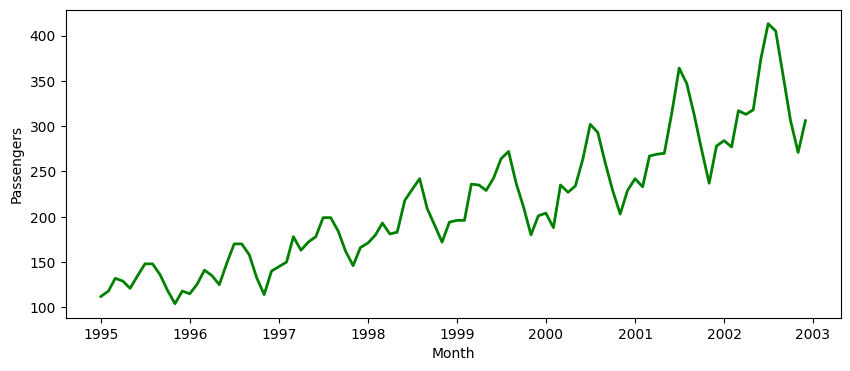

In [19]:
#lineplot
plt.figure(figsize=(10,4))
sns.lineplot(x='Month',y='Passengers',data=airlines,color='green',linewidth=2)

# **Scatterplot**

<Axes: xlabel='Month', ylabel='Passengers'>

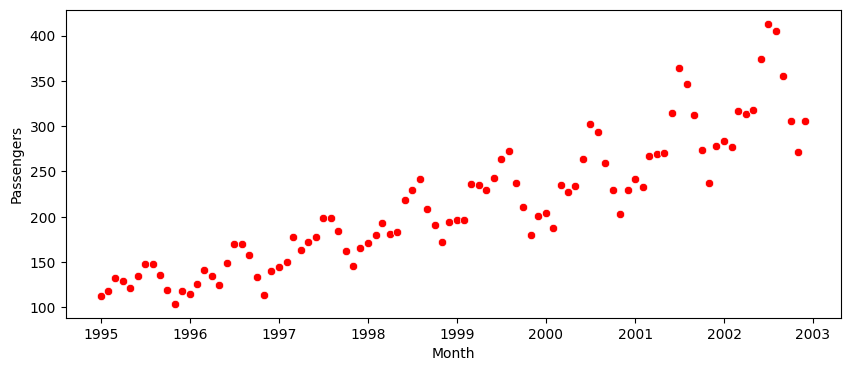

In [20]:
#Scatter plot
plt.figure(figsize=(10,4))
sns.scatterplot(x='Month',y='Passengers',data=airlines,color='red')

<Axes: xlabel='Month'>

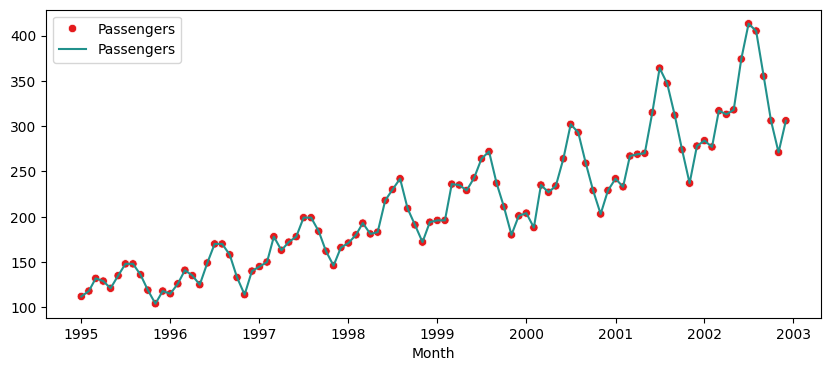

In [21]:
plt.figure(figsize=(10,4))
sns.scatterplot(airlines,palette='Set1')
sns.lineplot(airlines,palette='viridis')

# **Histogram and Density Plot**

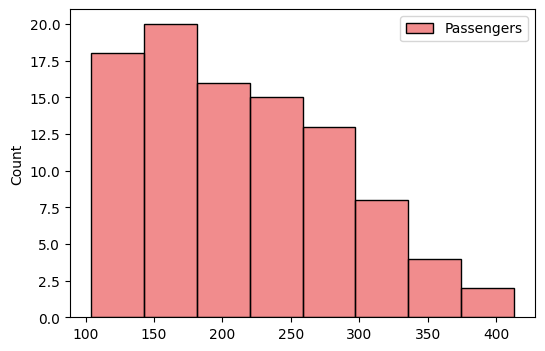

In [22]:
#histogram
plt.figure(figsize=(6,4))
sns.histplot(airlines,palette='Set1')
plt.show()

<Axes: xlabel='Passengers', ylabel='Density'>

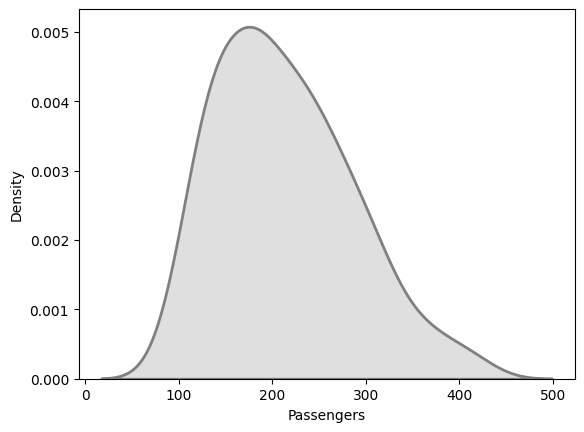

In [23]:
#Density plot
#kde plot
sns.kdeplot(airlines['Passengers'],shade=True,color='gray',linewidth=2)

<Axes: ylabel='Density'>

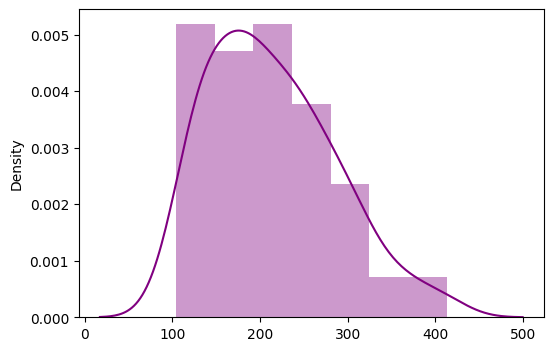

In [24]:
#distplot
plt.figure(figsize=(6,4))
sns.distplot(airlines,color='purple')

# **Boxplot**

In [25]:
airlines=pd.read_excel('Airlines+Data.xlsx',header=0,index_col=0,parse_dates=True,squeeze=True)
airlines.head()

Month
1995-01-01    112
1995-02-01    118
1995-03-01    132
1995-04-01    129
1995-05-01    121
Name: Passengers, dtype: int64

In [26]:
from pandas import DataFrame
from pandas import Grouper

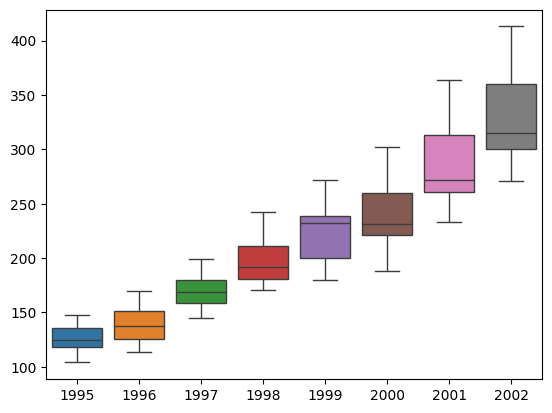

In [27]:
#boxplot for yearly data
groups=airlines.groupby(Grouper(freq='A'))
years=DataFrame()
for name,group in groups:
  years[name.year]=group.values
sns.boxplot(years)
plt.show()

# **Lagplot**

<Axes: xlabel='y(t)', ylabel='y(t + 3)'>

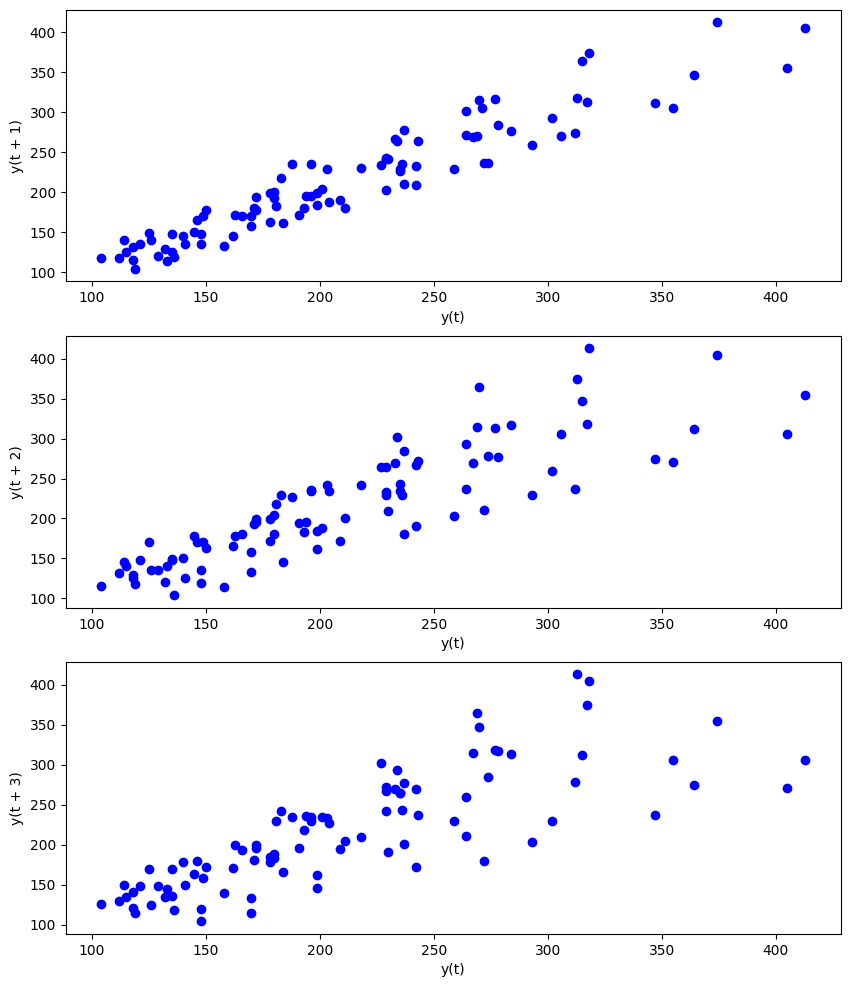

In [28]:
#lagplot
from pandas.plotting import lag_plot

plt.figure(figsize=(10,12))
plt.subplot(311)
lag_plot(airlines,lag=1,c='blue')
plt.subplot(312)
lag_plot(airlines,lag=2,c='blue')
plt.subplot(313)
lag_plot(airlines,lag=3,c='blue')

# **ACF Plot**

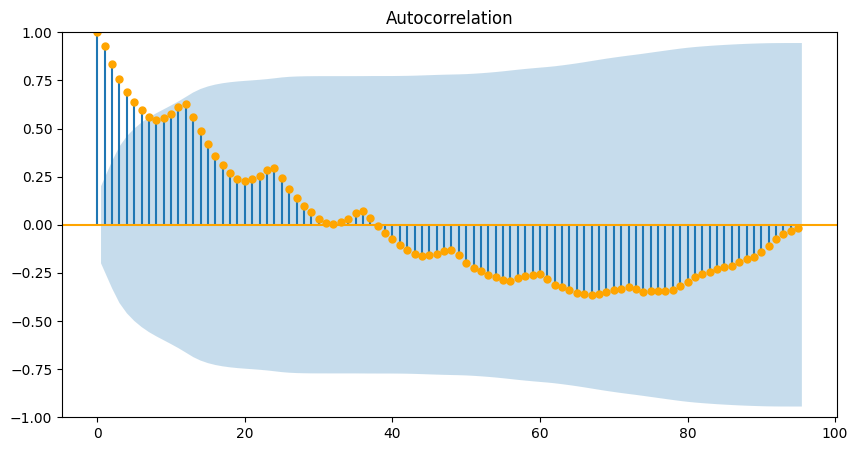

In [29]:
#acf plot
from statsmodels.graphics.tsaplots import plot_acf
fig,ax=plt.subplots(figsize=(10,5))
plot_acf(airlines,lags=95,c='orange',ax=ax)
plt.show()

# **Features Scaling**

# **Sampling and Transformations**

In [30]:
airlines=pd.read_excel('Airlines+Data.xlsx',header=0,index_col=0,parse_dates=True,squeeze=True)
airlines.head()

Month
1995-01-01    112
1995-02-01    118
1995-03-01    132
1995-04-01    129
1995-05-01    121
Name: Passengers, dtype: int64

# **Sampling**

**upsample**

In [31]:
#upsample is use to increase the frequency. here we increase the frequency and convert it to "Month-->Day"

In [32]:
#upsample
upsample=airlines.resample('D')
upsample=upsample.mean()
upsample.head(32)

Month
1995-01-01    112.0
1995-01-02      NaN
1995-01-03      NaN
1995-01-04      NaN
1995-01-05      NaN
1995-01-06      NaN
1995-01-07      NaN
1995-01-08      NaN
1995-01-09      NaN
1995-01-10      NaN
1995-01-11      NaN
1995-01-12      NaN
1995-01-13      NaN
1995-01-14      NaN
1995-01-15      NaN
1995-01-16      NaN
1995-01-17      NaN
1995-01-18      NaN
1995-01-19      NaN
1995-01-20      NaN
1995-01-21      NaN
1995-01-22      NaN
1995-01-23      NaN
1995-01-24      NaN
1995-01-25      NaN
1995-01-26      NaN
1995-01-27      NaN
1995-01-28      NaN
1995-01-29      NaN
1995-01-30      NaN
1995-01-31      NaN
1995-02-01    118.0
Freq: D, Name: Passengers, dtype: float64

In [33]:
#interpolation
#It is use to fill the missing values in between months i.e,after converting into months to days

In [34]:
#interpolation
interpolation=upsample.interpolate(method='linear')
interpolation.head()

Month
1995-01-01    112.000000
1995-01-02    112.193548
1995-01-03    112.387097
1995-01-04    112.580645
1995-01-05    112.774194
Freq: D, Name: Passengers, dtype: float64

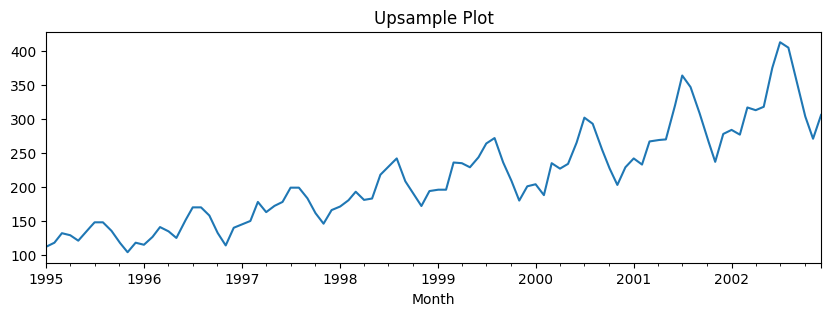

In [35]:
#plots
interpolation.plot(figsize=(10,3))
plt.title('Upsample Plot')
plt.show()

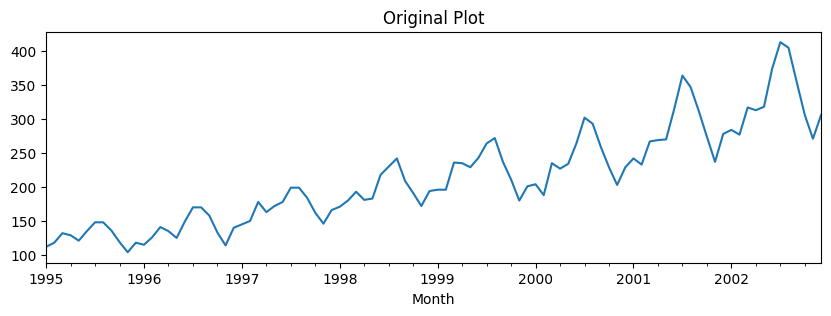

In [36]:
#plot for airlines
airlines.plot(figsize=(10,3))
plt.title('Original Plot')
plt.show()

**downsample**

In [37]:
#downsample
#It is use to decrease the frequency. Here we reduce the frequency and convert "months into quarters"

In [38]:
#downsample
downsample=airlines.resample('Q')
downsample=downsample.mean()
downsample.head(12)

Month
1995-03-31    120.666667
1995-06-30    128.333333
1995-09-30    144.000000
1995-12-31    113.666667
1996-03-31    127.333333
1996-06-30    136.333333
1996-09-30    166.000000
1996-12-31    129.000000
1997-03-31    157.666667
1997-06-30    171.000000
1997-09-30    194.000000
1997-12-31    158.000000
Freq: Q-DEC, Name: Passengers, dtype: float64

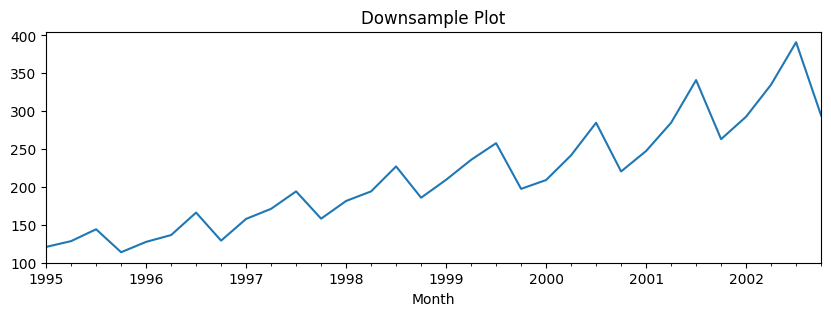

In [39]:
#plot for downsample
downsample.plot(figsize=(10,3))
plt.title('Downsample Plot')
plt.show()

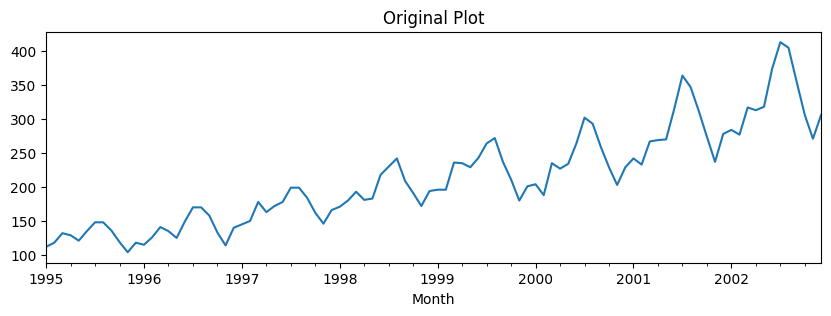

In [40]:
#plot for airlines
airlines.plot(figsize=(10,3))
plt.title('Original Plot')
plt.show()

# **Before Transformation**

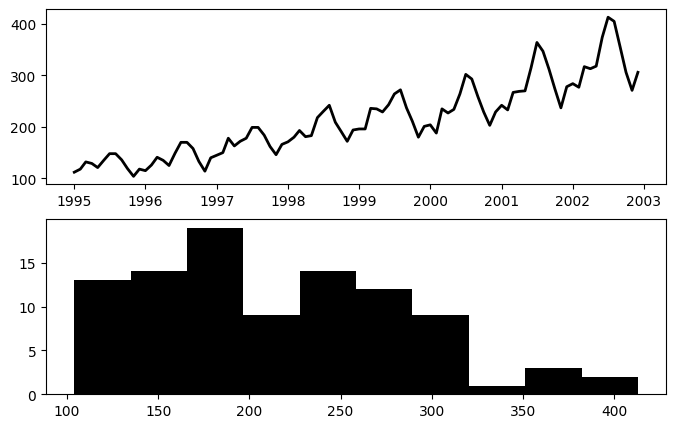

In [41]:
#original airlines dataset plot
plt.figure(figsize=(8,5))
plt.subplot(211)
plt.plot(airlines,color='black',linewidth=2)
plt.subplot(212)
plt.hist(airlines,color='black')
plt.show()

# **Transformation**

In [42]:
#It is perform to convert non-stationary data into stationary data//
#Reduces trends and seasonality

# **SquareRoot Transformation**

In [43]:
from pandas import DataFrame
from numpy import sqrt

In [44]:
#squareroot transformation
squareroot=DataFrame(airlines.values)
squareroot.columns=['Passengers']
squareroot['Passengers']=sqrt(squareroot['Passengers'])
squareroot.head()

,Passengers
0,10.583005
1,10.862780
2,11.489125
3,11.357817
4,11.000000


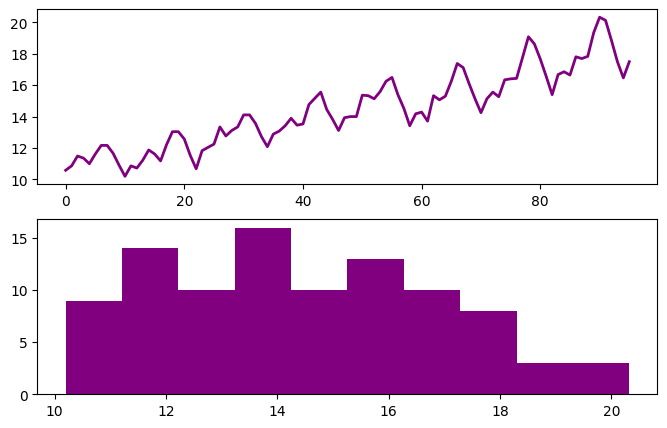

In [45]:
#plot for square root transformation
plt.figure(figsize=(8,5))
plt.subplot(211)
plt.plot(squareroot,color='purple',linewidth=2)
plt.subplot(212)
plt.hist(squareroot,color='purple')
plt.show()

# **Log Transformation**

In [46]:
from numpy import log

In [47]:
#log transformation
lg=DataFrame(airlines.values)
lg.columns=['Passengers']
lg['Passengers']=log(lg['Passengers'])
lg.head()

,Passengers
0,4.718499
1,4.770685
2,4.882802
3,4.859812
4,4.795791


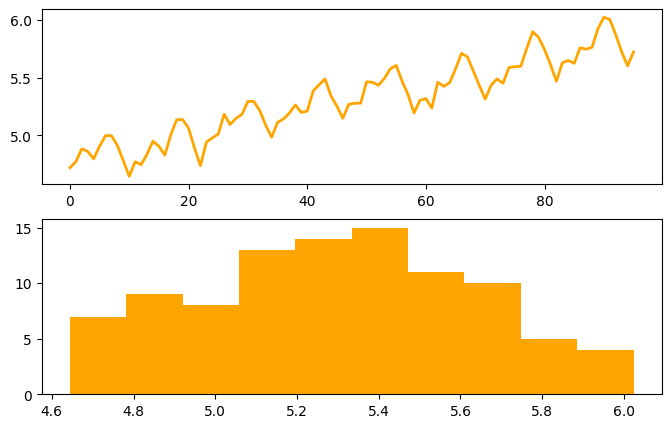

In [48]:
#plot for log transformation
plt.figure(figsize=(8,5))
plt.subplot(211)
plt.plot(lg['Passengers'],color='orange',linewidth=2)
plt.subplot(212)
plt.hist(lg['Passengers'],color='orange')
plt.show()

# **Feature Engineering**

In [49]:
airlines_df=pd.read_excel('Airlines+Data.xlsx',header=0,parse_dates=True)
airlines_df.rename({'Month':'Date'},axis=1,inplace=True)
airlines_df.head()

,Date,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


**Separating Months and Years into separate columns for visualization purpose and for extracting meaningful insights**

In [50]:
airlines_df['Date']=pd.to_datetime(airlines_df.Date,format='%b-%y')
airlines_df['Month']=airlines_df['Date'].dt.strftime('%b')
airlines_df['Years']=airlines_df['Date'].dt.strftime('%Y')
airlines_df['date']=airlines_df.Date.dt.strftime('%d')
airlines_df['Day']=airlines_df.Date.dt.strftime('%A')

In [51]:
airlines_df

,Date,Passengers,Month,Years,date,Day
0,1995-01-01,112,Jan,1995,01,Sunday
1,1995-02-01,118,Feb,1995,01,Wednesday
2,1995-03-01,132,Mar,1995,01,Wednesday
3,1995-04-01,129,Apr,1995,01,Saturday
4,1995-05-01,121,May,1995,01,Monday
...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,01,Thursday
92,2002-09-01,355,Sep,2002,01,Sunday
93,2002-10-01,306,Oct,2002,01,Tuesday
94,2002-11-01,271,Nov,2002,01,Friday


# **Visualization**

# **HeatMap Visualization**

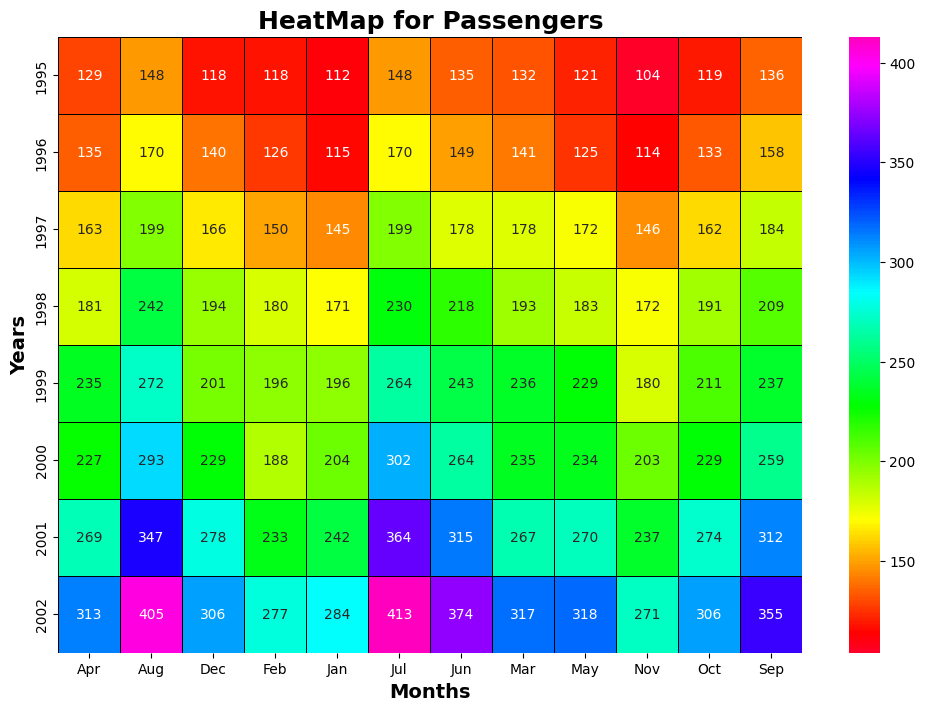

In [52]:
#heatmap
plt.figure(figsize=(12,8))
pivot=pd.pivot_table(data=airlines_df,values='Passengers',index='Years',columns='Month',aggfunc='mean',fill_value=0)
sns.heatmap(pivot,annot=True,cmap='gist_rainbow',fmt='g',linewidth=0.72,linecolor='black')
plt.title('HeatMap for Passengers',fontweight='bold',fontsize=18)
plt.xlabel('Months',fontweight='bold',fontsize=14)
plt.ylabel('Years',fontweight='bold',fontsize=14)
plt.show()

# **BoxPlot**

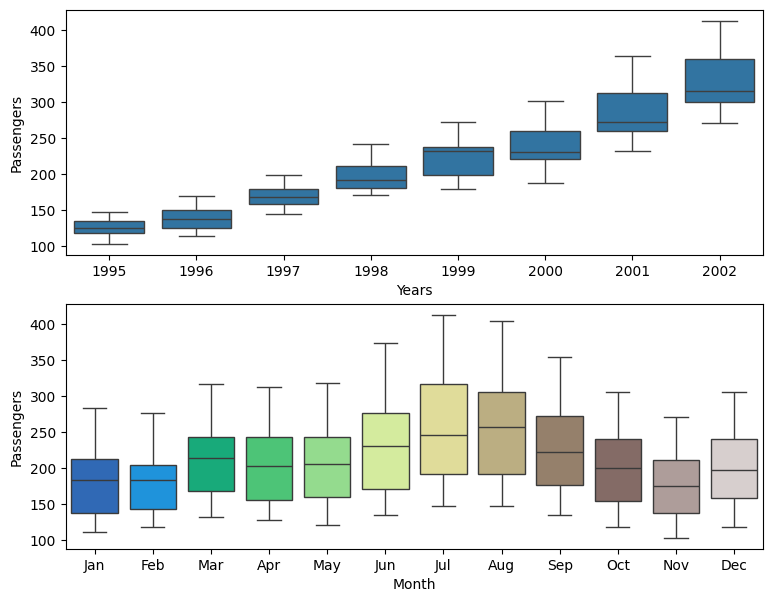

In [53]:
#boxplot
plt.figure(figsize=(9,7))
plt.subplot(211)
sns.boxplot(x='Years',y='Passengers',data=airlines_df)
plt.subplot(212)
sns.boxplot(x='Month',y='Passengers',data=airlines_df,palette='terrain')
plt.show()

# **Lineplot**

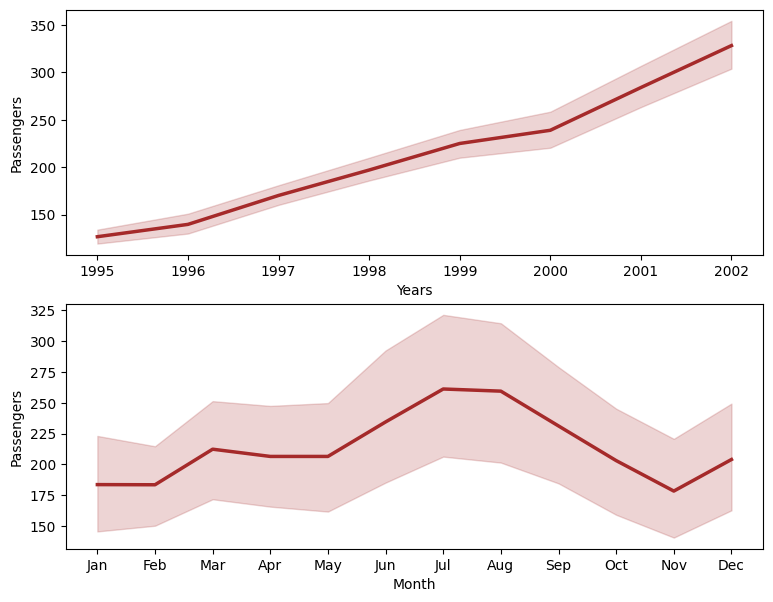

In [54]:
#lineplot
plt.figure(figsize=(9,7))
plt.subplot(211)
sns.lineplot(x='Years',y='Passengers',data=airlines_df,color='brown',linewidth=2.5)
plt.subplot(212)
sns.lineplot(x='Month',y='Passengers',data=airlines_df,color='brown',linewidth=2.5)
plt.show()

# **Moving Average Method**

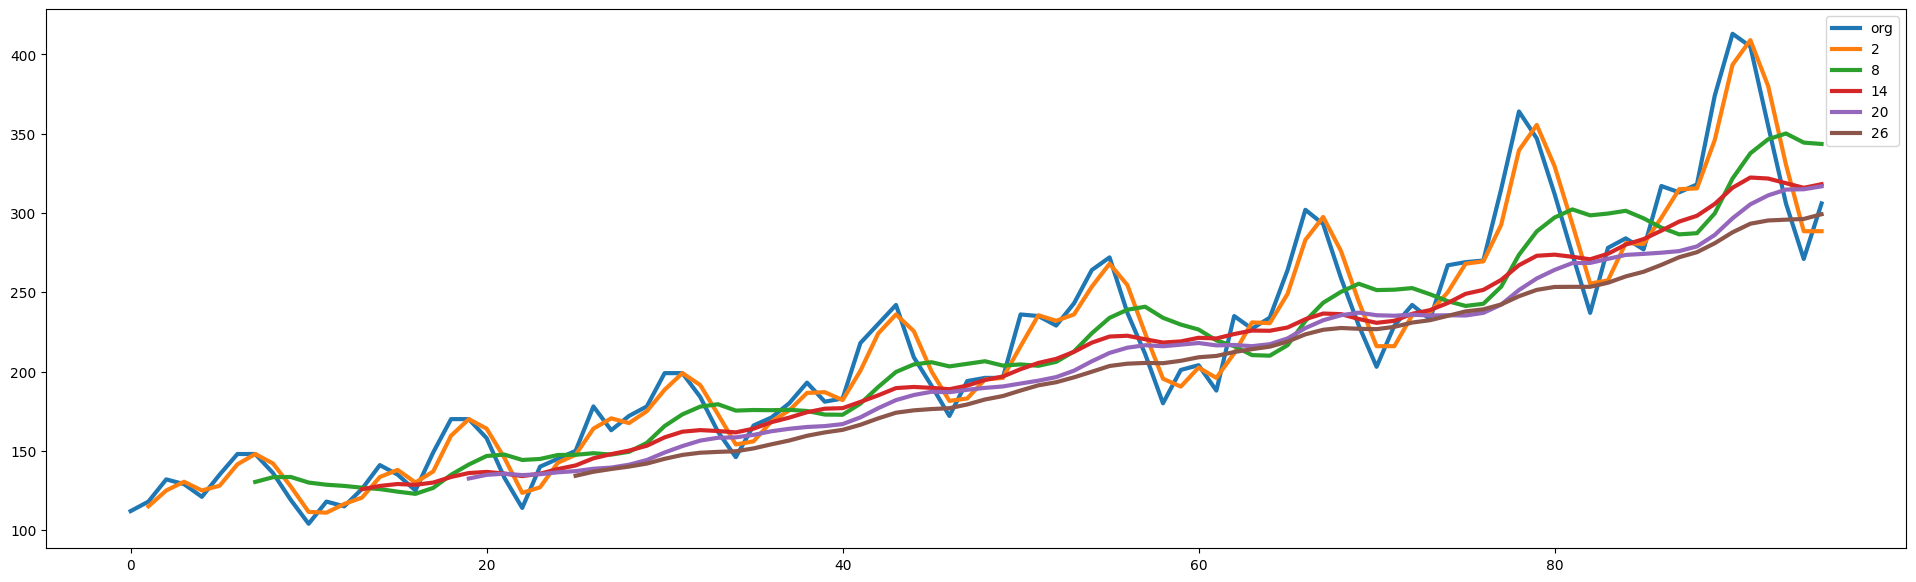

In [55]:
plt.figure(figsize=(24,7))
airlines_df['Passengers'].plot(label='org',linewidth=3)
for i in range(2,30,6):
  airlines_df['Passengers'].rolling(i).mean().plot(label=str(i),linewidth=3)
plt.legend(loc='best')

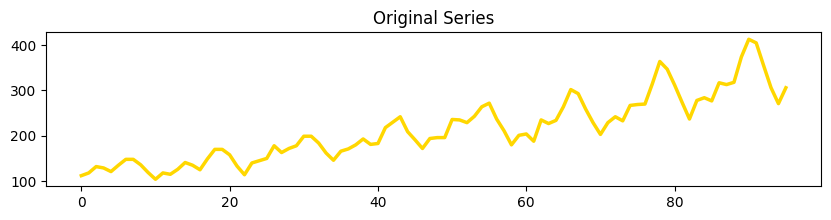

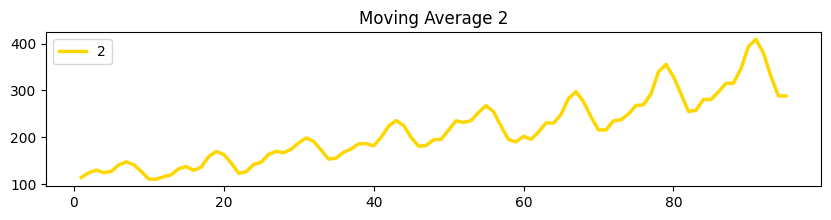

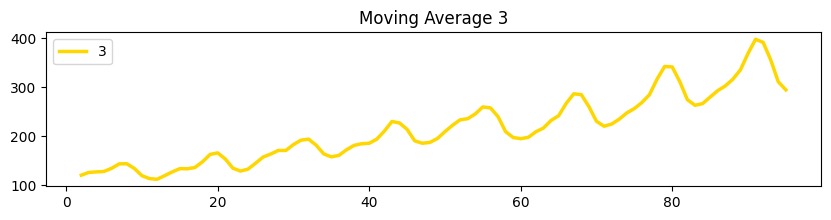

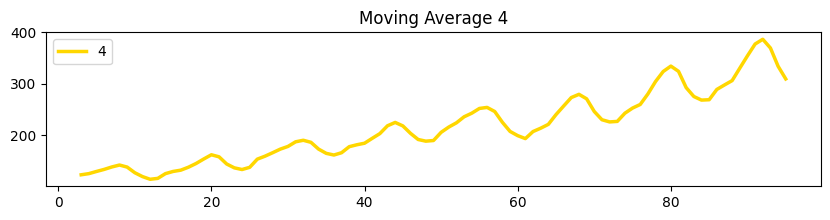

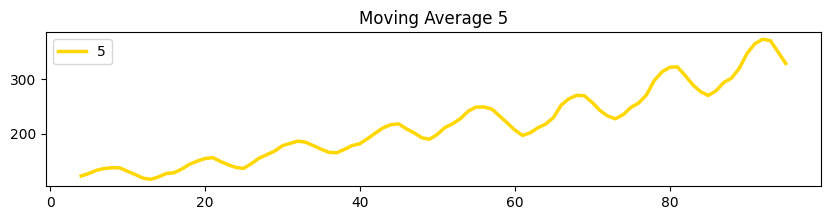

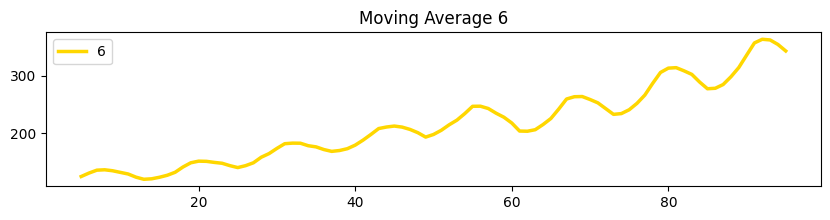

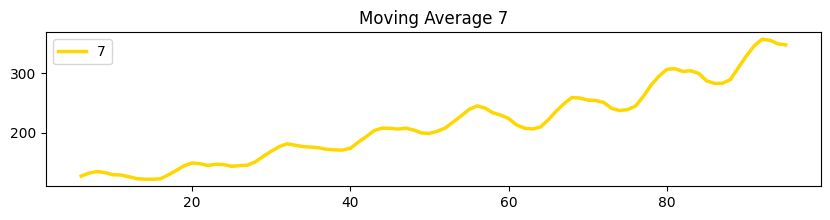

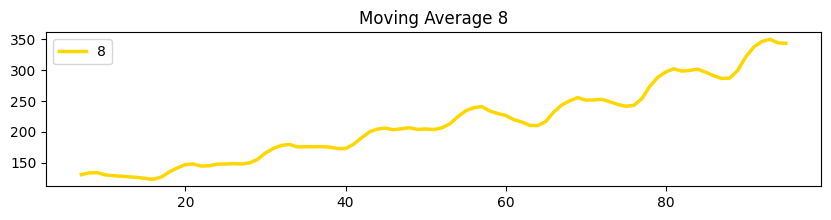

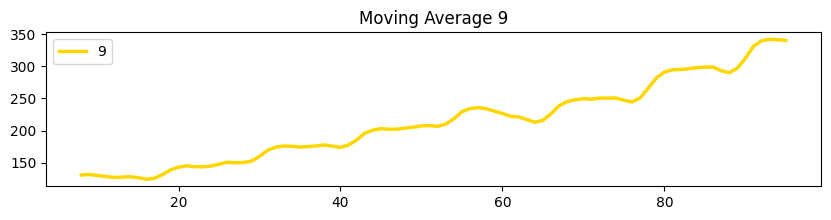

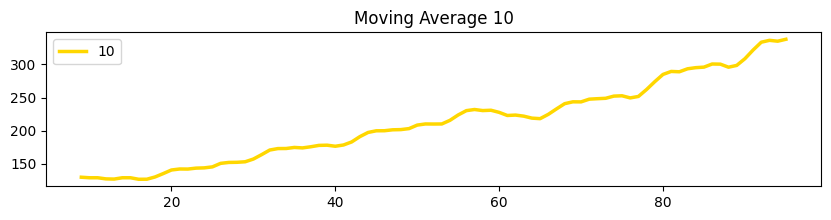

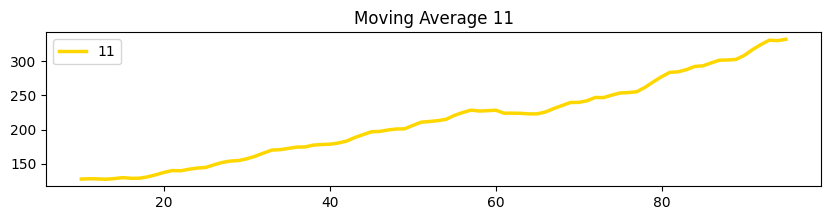

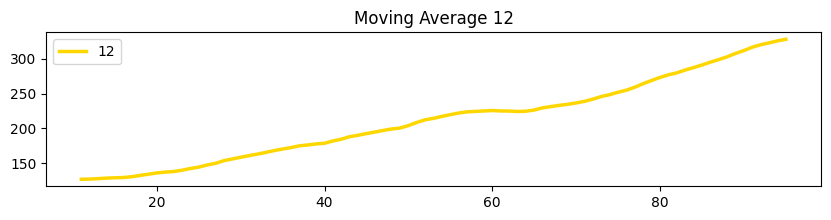

In [56]:
plt.figure(figsize=(10,2))
airlines_df.Passengers.plot(label="org",color='gold',linewidth=2.5)
plt.title("Original Series")
for i in range(2,13):
    plt.figure(figsize=(10,2))
    airlines_df["Passengers"].rolling(i).mean().plot(label=str(i),color='gold',linewidth=2.5)
    plt.title("Moving Average "+str(i))
    plt.legend(loc='best')
    plt.show()

# **Time Series Decomposition Plot**

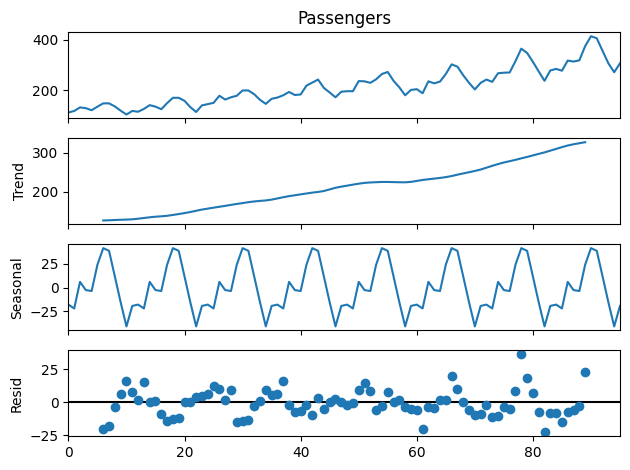

In [57]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose=seasonal_decompose(airlines_df['Passengers'],period=12)
decompose.plot()
plt.show()

# **ACF Plot and PACF Plot**

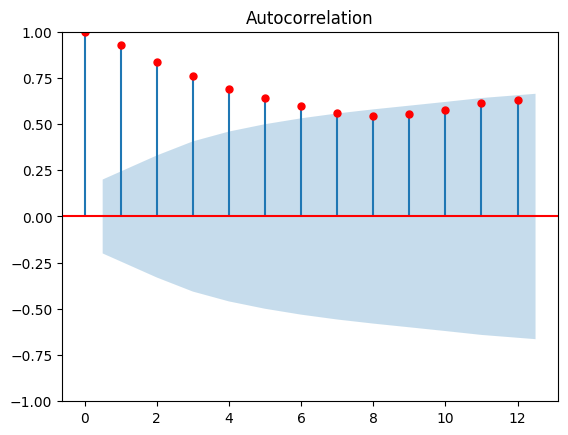

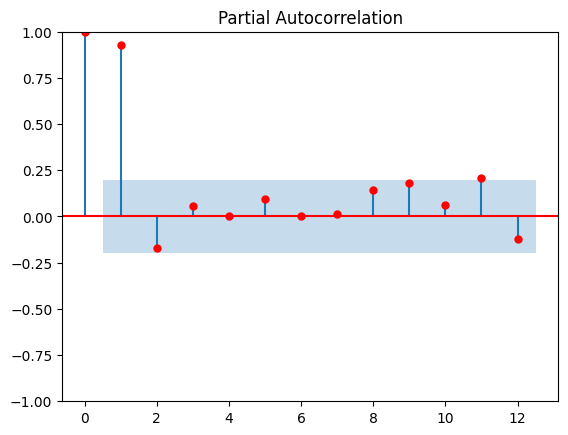

In [58]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(airlines_df['Passengers'],lags=12,color='red')
tsa_plots.plot_pacf(airlines_df['Passengers'],lags=12,color='red')
plt.show()

# **Feature Engineering**

# **Feature Creation**

In [59]:
#creating month dummies and other important features for model building

In [60]:
airlines_df['t']=np.arange(1,97)
airlines_df['t_square']=airlines_df['t']*airlines_df['t']
airlines_df['log_passengers']=np.log(airlines_df['Passengers'])
airlines_df.head()

,Date,Passengers,Month,Years,date,Day,t,t_square,log_passengers
0,1995-01-01,112,Jan,1995,01,Sunday,1,1,4.718499
1,1995-02-01,118,Feb,1995,01,Wednesday,2,4,4.770685
2,1995-03-01,132,Mar,1995,01,Wednesday,3,9,4.882802
3,1995-04-01,129,Apr,1995,01,Saturday,4,16,4.859812
4,1995-05-01,121,May,1995,01,Monday,5,25,4.795791


In [61]:
airlines_df=airlines_df.iloc[0:,[0,1,2,6,7,8,3,4,5]]
airlines_df.head()

,Date,Passengers,Month,t,t_square,log_passengers,Years,date,Day
0,1995-01-01,112,Jan,1,1,4.718499,1995,01,Sunday
1,1995-02-01,118,Feb,2,4,4.770685,1995,01,Wednesday
2,1995-03-01,132,Mar,3,9,4.882802,1995,01,Wednesday
3,1995-04-01,129,Apr,4,16,4.859812,1995,01,Saturday
4,1995-05-01,121,May,5,25,4.795791,1995,01,Monday


In [62]:
model_dummies=pd.DataFrame(pd.get_dummies(airlines_df['Month']))

In [63]:
airlines_df=pd.concat([airlines_df,model_dummies],axis=1)
airlines_df

,Date,Passengers,Month,t,t_square,log_passengers,Years,date,Day,Apr,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,1,1,4.718499,1995,01,Sunday,0,...,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,2,4,4.770685,1995,01,Wednesday,0,...,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,3,9,4.882802,1995,01,Wednesday,0,...,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,4,16,4.859812,1995,01,Saturday,1,...,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,5,25,4.795791,1995,01,Monday,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,92,8464,6.003887,2002,01,Thursday,0,...,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,Sep,93,8649,5.872118,2002,01,Sunday,0,...,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,Oct,94,8836,5.723585,2002,01,Tuesday,0,...,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,Nov,95,9025,5.602119,2002,01,Friday,0,...,0,0,0,0,0,0,0,1,0,0


In [64]:
airlines_df.shape

(96, 21)

# **Spliting Data**

**spliting into training and testing data**

In [65]:
#spliting into training and testing data

In [66]:
train=airlines_df.iloc[:len(airlines_df)-16]
test=airlines_df.iloc[len(airlines_df)-16:]

In [67]:
train=airlines_df.head(80)
test=airlines_df.tail(16)

In [68]:
train

,Date,Passengers,Month,t,t_square,log_passengers,Years,date,Day,Apr,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,1,1,4.718499,1995,01,Sunday,0,...,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,2,4,4.770685,1995,01,Wednesday,0,...,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,3,9,4.882802,1995,01,Wednesday,0,...,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,4,16,4.859812,1995,01,Saturday,1,...,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,5,25,4.795791,1995,01,Monday,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,2001-04-01,269,Apr,76,5776,5.594711,2001,01,Sunday,1,...,0,0,0,0,0,0,0,0,0,0
76,2001-05-01,270,May,77,5929,5.598422,2001,01,Tuesday,0,...,0,0,0,0,0,0,1,0,0,0
77,2001-06-01,315,Jun,78,6084,5.752573,2001,01,Friday,0,...,0,0,0,0,1,0,0,0,0,0
78,2001-07-01,364,Jul,79,6241,5.897154,2001,01,Sunday,0,...,0,0,0,1,0,0,0,0,0,0


In [69]:
test

,Date,Passengers,Month,t,t_square,log_passengers,Years,date,Day,Apr,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
80,2001-09-01,312,Sep,81,6561,5.743003,2001,01,Saturday,0,...,0,0,0,0,0,0,0,0,0,1
81,2001-10-01,274,Oct,82,6724,5.613128,2001,01,Monday,0,...,0,0,0,0,0,0,0,0,1,0
82,2001-11-01,237,Nov,83,6889,5.468060,2001,01,Thursday,0,...,0,0,0,0,0,0,0,1,0,0
83,2001-12-01,278,Dec,84,7056,5.627621,2001,01,Saturday,0,...,1,0,0,0,0,0,0,0,0,0
84,2002-01-01,284,Jan,85,7225,5.648974,2002,01,Tuesday,0,...,0,0,1,0,0,0,0,0,0,0
85,2002-02-01,277,Feb,86,7396,5.624018,2002,01,Friday,0,...,0,1,0,0,0,0,0,0,0,0
86,2002-03-01,317,Mar,87,7569,5.758902,2002,01,Friday,0,...,0,0,0,0,0,1,0,0,0,0
87,2002-04-01,313,Apr,88,7744,5.746203,2002,01,Monday,1,...,0,0,0,0,0,0,0,0,0,0
88,2002-05-01,318,May,89,7921,5.762051,2002,01,Wednesday,0,...,0,0,0,0,0,0,1,0,0,0
89,2002-06-01,374,Jun,90,8100,5.924256,2002,01,Saturday,0,...,0,0,0,0,1,0,0,0,0,0


In [70]:
print(train.shape)
print(test.shape)

(80, 21)
(16, 21)


# **Forecasting Models**

# **Models Driven Methods**

# ***Building Different Forecasting Models and Comparing RMSE Values***

In [71]:
import statsmodels.formula.api as smf

**1.Linear Model**

In [72]:
#Linear Model
linear=smf.ols('Passengers~t',data=train).fit()
linear_pred=pd.Series(linear.predict(pd.DataFrame(test['t'])))
rmse_linear=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(linear_pred))**2))
print('rmse_linear:',rmse_linear)

rmse_linear: 47.542624067726805


**2.Exponential Model**

In [73]:
#exponential model
exponential=smf.ols('log_passengers~t',data=train).fit()
exponential_pred=pd.Series(exponential.predict(pd.DataFrame(test['t'])))
rmse_exp=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(exponential_pred)))**2))
print('rmse_exp:',rmse_exp)

rmse_exp: 43.79373939334308


**3.Quadratic Model**

In [74]:
#Quadratic Model
quad=smf.ols('Passengers~t+t_square',data=train).fit()
quad_pred=pd.Series(quad.predict(pd.DataFrame(test[['t','t_square']])))
rmse_quad=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(quad_pred))**2))
print('rmse_quad:',rmse_quad)

rmse_quad: 43.65440369584204


**4.Additive Seasonality**

In [75]:
#Additive Seasonality
add_sea=smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
add_sea_pred=pd.Series(add_sea.predict(pd.DataFrame(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']])))
rmse_add_sea=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(add_sea_pred))**2))
print('rmse_add_sea:',rmse_add_sea)

rmse_add_sea: 129.266476414433


**5.Additive Seasonality Quadratic**

In [76]:
#Additive Seasonality quadratic
add_sea_quad=smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
add_sea_quad_pred=pd.Series(add_sea_quad.predict(pd.DataFrame(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t_square']])))
rmse_add_sea_quad=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(add_sea_quad_pred))**2))
print('rmse_add_sea_quad:',rmse_add_sea_quad)

rmse_add_sea_quad: 23.910983570107785


**6.Multiplicative Seasonality**

In [77]:
#Multiplicative Seasonality
mul_sea=smf.ols('log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
mul_sea_pred=pd.Series(mul_sea.predict(pd.DataFrame(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']])))
rmse_mul_sea=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(mul_sea_pred)))**2))
print('rmse_mul_sea:',rmse_mul_sea)

rmse_mul_sea: 135.3264841462107


**7.Multiplicative Seasonality Quadratic**

In [78]:
#Multiplicative Seasonality Quadratic
mul_sea_quad=smf.ols('log_passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
mul_sea_quad_pred=pd.Series(mul_sea_quad.predict(pd.DataFrame(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t_square']])))
rmse_mul_sea_quad=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(mul_sea_quad_pred)))**2))
print('rmse_mul_sea_quad:',rmse_mul_sea_quad)

rmse_mul_sea_quad: 23.08634854616924


**8.Multiplicative Additive Seasonality**

In [79]:
#Multiplicative additive seasonality
mul_add_sea=smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
mul_add_sea_pred=pd.Series(mul_add_sea.predict(pd.DataFrame(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t']])))
rmse_mul_add_sea=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(mul_add_sea_pred)))**2))
print('rmse_mul_add_sea:',rmse_mul_add_sea)

rmse_mul_add_sea: 9.469000230375238


# **Comparing all RMSE Values**

**DataFrame showing all RMSE Values**

In [80]:
# DataFrame showing all "RMSE Values"

In [81]:
data={'Models':pd.Series(['linear_rmse','exp_rmse','quad_rmse','add_sea_rmse','add_sea_quad_rmse','mul_sea_rmse','mul_sea_quad_rmse','mul_add_sea_rmse']),
      'RMSE_values':pd.Series([rmse_linear,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_mul_sea,rmse_mul_sea_quad,rmse_mul_add_sea])}
RMSE_Table=pd.DataFrame(data)
RMSE_Table=RMSE_Table.sort_values(['RMSE_values'])
RMSE_Table

,Models,RMSE_values
7,mul_add_sea_rmse,9.469000
6,mul_sea_quad_rmse,23.086349
4,add_sea_quad_rmse,23.910984
2,quad_rmse,43.654404
1,exp_rmse,43.793739
0,linear_rmse,47.542624
3,add_sea_rmse,129.266476
5,mul_sea_rmse,135.326484


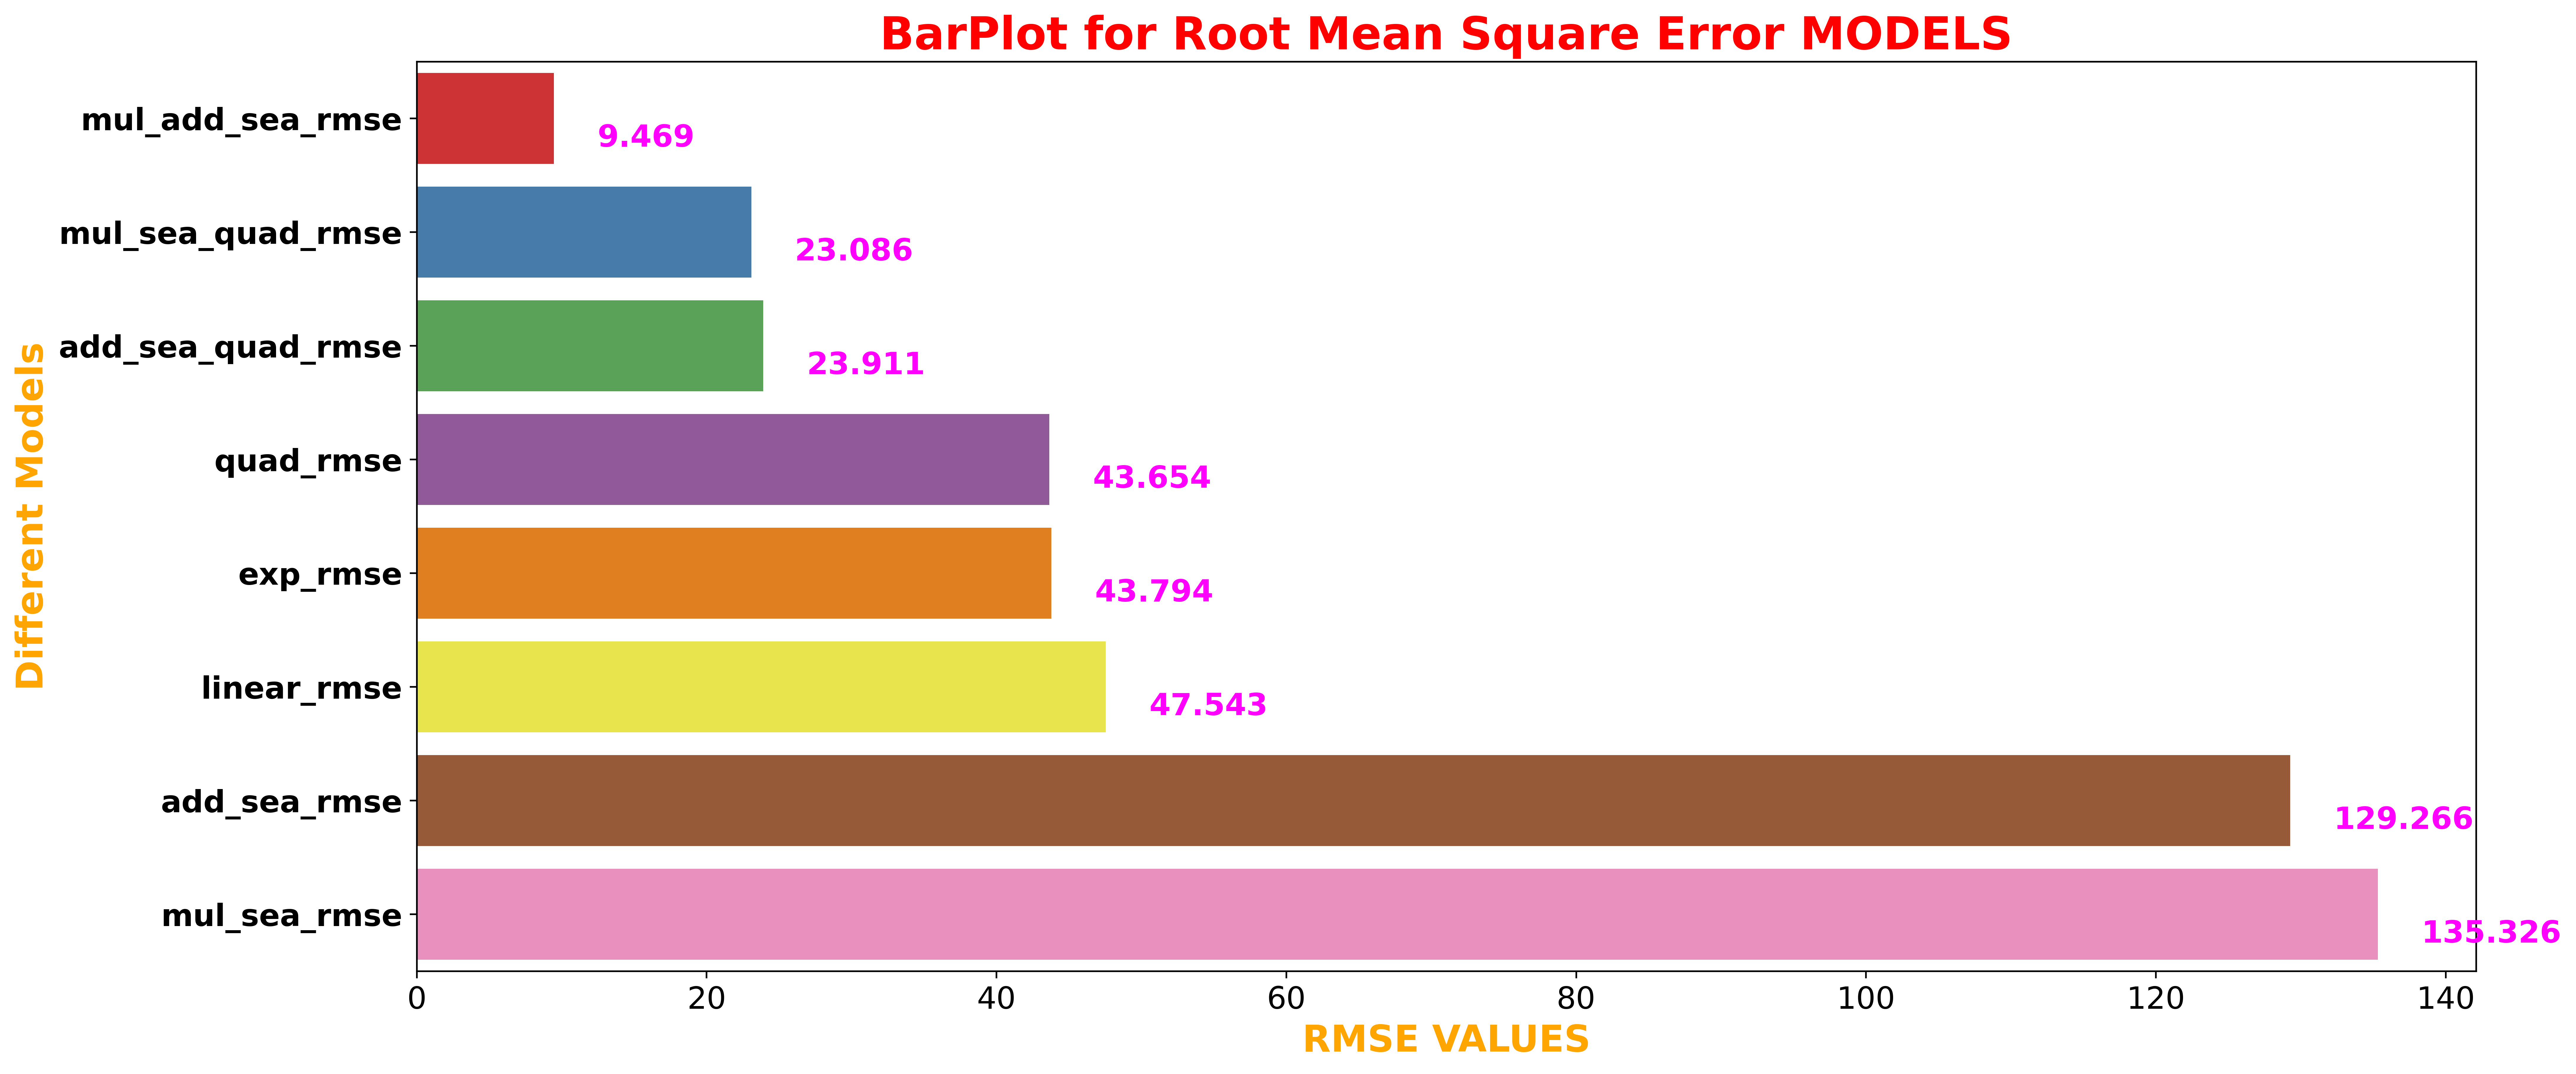

In [82]:
#barplot
f,axe=plt.subplots(1,1,figsize=(18,8),dpi=500)
sns.barplot(x='RMSE_values',y='Models',data=RMSE_Table,ax=axe,palette='Set1')
plt.xlabel('RMSE VALUES',size=18,fontweight='bold',color='orange')
plt.ylabel('Different Models',size=18,fontweight='bold',color='orange')
plt.yticks(fontsize=15,fontweight='bold')
plt.xticks(fontsize=15)
plt.title('BarPlot for Root Mean Square Error MODELS',fontsize=22,fontweight='bold',color='red')
for i, v in enumerate(np.round(RMSE_Table.RMSE_values.values,3)):
    axe.text(v+3,i+.25,str(v),color='fuchsia', fontweight ='bold',fontsize= 15)
plt.show()

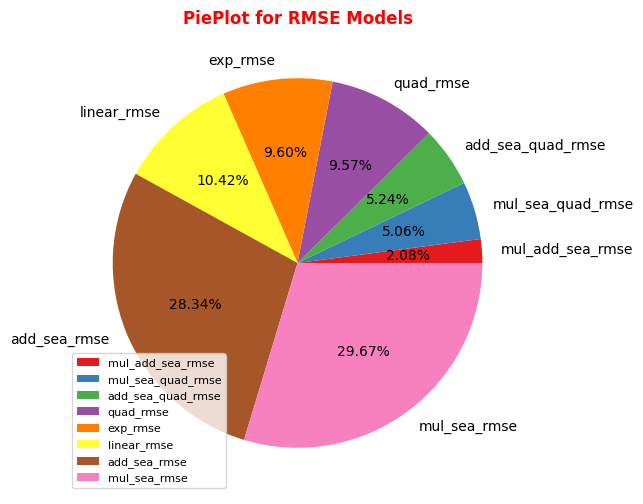

In [83]:
#pie plot
plt.figure(figsize=(6,6))
palette_color = sns.color_palette('Set1')
plt.pie(RMSE_Table['RMSE_values'],labels=RMSE_Table['Models'],autopct="%.2f%%",colors=palette_color)
plt.title('PiePlot for RMSE Models',fontweight='bold',color='red')
plt.legend(fontsize=8,loc='lower left')
plt.show()

In [84]:
#From above RMSE table we can say "multiplicative additive seasonality" is a best model with least error
#when compare to other models.
#mul_add_sea_rmse = 9.469000
#So consider mul_add_sea_rmse to perform further model building tasks.

# **Forecasting with new dataset using Model Driven Method**

**Creating new dataset**

In [85]:
#Now predicting the data
#creating a future dataset by using existing data

In [86]:
date={'Date':['2003-01-01','2003-02-01','2003-03-01','2003-04-01','2003-05-01','2003-06-01','2003-07-01','2003-08-01','2003-09-01','2003-10-01','2003-11-01','2003-12-01']}
date=pd.DataFrame(date)

In [87]:
date['Date']=pd.to_datetime(date.Date,format='%Y-%m-%d')
date['Month']=date.Date.dt.strftime('%b')
date['Years']=date['Date'].dt.strftime('%Y')

In [88]:
date['t']=np.arange(97,109)
date['t_square']=date['t']*date['t']
dumm=pd.get_dummies(date['Month'])

In [89]:
predict_set=pd.concat([date,dumm],axis=1)
predict_set

,Date,Month,Years,t,t_square,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,2003-01-01,Jan,2003,97,9409,0,0,0,0,1,0,0,0,0,0,0,0
1,2003-02-01,Feb,2003,98,9604,0,0,0,1,0,0,0,0,0,0,0,0
2,2003-03-01,Mar,2003,99,9801,0,0,0,0,0,0,0,1,0,0,0,0
3,2003-04-01,Apr,2003,100,10000,1,0,0,0,0,0,0,0,0,0,0,0
4,2003-05-01,May,2003,101,10201,0,0,0,0,0,0,0,0,1,0,0,0
5,2003-06-01,Jun,2003,102,10404,0,0,0,0,0,0,1,0,0,0,0,0
6,2003-07-01,Jul,2003,103,10609,0,0,0,0,0,1,0,0,0,0,0,0
7,2003-08-01,Aug,2003,104,10816,0,1,0,0,0,0,0,0,0,0,0,0
8,2003-09-01,Sep,2003,105,11025,0,0,0,0,0,0,0,0,0,0,0,1
9,2003-10-01,Oct,2003,106,11236,0,0,0,0,0,0,0,0,0,0,1,0


In [90]:
#Prediction on the predict_set dataframe
#now predicting the passengers for predict_set dataframe
#using entire airlines_df dataframe for training purpose and predict_set dataframe for prediction purpose
#As above after buiding models we get to know that best model with least error is "Multiplicative Additive Seasonality"

# **Forecasting based on Multiplicative Additive Seasonality Model**


In [91]:
#final prediction based on multiplicative additive seasonality Model

In [92]:
#final model
finalmodel=smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=airlines_df).fit()
predict_finalmodel=pd.Series(finalmodel.predict(pd.DataFrame(predict_set)))
predict_finalmodel

0     5.770755
1     5.781280
2     5.924459
3     5.891606
4     5.885083
5     6.008926
6     6.115180
7     6.113063
8     6.002824
9     5.872713
10    5.742262
11    5.878809
dtype: float64

In [93]:
predict_set['Forecasting_Passengers']=pd.Series(np.exp(predict_finalmodel))
predict_set

,Date,Month,Years,t,t_square,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Forecasting_Passengers
0,2003-01-01,Jan,2003,97,9409,0,0,0,0,1,0,0,0,0,0,0,0,320.779889
1,2003-02-01,Feb,2003,98,9604,0,0,0,1,0,0,0,0,0,0,0,0,324.173779
2,2003-03-01,Mar,2003,99,9801,0,0,0,0,0,0,0,1,0,0,0,0,374.075905
3,2003-04-01,Apr,2003,100,10000,1,0,0,0,0,0,0,0,0,0,0,0,361.986306
4,2003-05-01,May,2003,101,10201,0,0,0,0,0,0,0,0,1,0,0,0,359.632793
5,2003-06-01,Jun,2003,102,10404,0,0,0,0,0,0,1,0,0,0,0,0,407.045777
6,2003-07-01,Jul,2003,103,10609,0,0,0,0,0,1,0,0,0,0,0,0,452.677464
7,2003-08-01,Aug,2003,104,10816,0,1,0,0,0,0,0,0,0,0,0,0,451.720349
8,2003-09-01,Sep,2003,105,11025,0,0,0,0,0,0,0,0,0,0,0,1,404.569872
9,2003-10-01,Oct,2003,106,11236,0,0,0,0,0,0,0,0,0,0,1,0,355.211286


In [94]:
#combining both actual and predicted dataframe
new_var=pd.concat([airlines_df,predict_set])
new_var

,Date,Passengers,Month,t,t_square,log_passengers,Years,date,Day,Apr,...,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Forecasting_Passengers
0,1995-01-01,112.0,Jan,1,1,4.718499,1995,01,Sunday,0,...,0,1,0,0,0,0,0,0,0,NaN
1,1995-02-01,118.0,Feb,2,4,4.770685,1995,01,Wednesday,0,...,1,0,0,0,0,0,0,0,0,NaN
2,1995-03-01,132.0,Mar,3,9,4.882802,1995,01,Wednesday,0,...,0,0,0,0,1,0,0,0,0,NaN
3,1995-04-01,129.0,Apr,4,16,4.859812,1995,01,Saturday,1,...,0,0,0,0,0,0,0,0,0,NaN
4,1995-05-01,121.0,May,5,25,4.795791,1995,01,Monday,0,...,0,0,0,0,0,1,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,2003-08-01,NaN,Aug,104,10816,NaN,2003,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,451.720349
8,2003-09-01,NaN,Sep,105,11025,NaN,2003,NaN,NaN,0,...,0,0,0,0,0,0,0,0,1,404.569872
9,2003-10-01,NaN,Oct,106,11236,NaN,2003,NaN,NaN,0,...,0,0,0,0,0,0,0,1,0,355.211286
10,2003-11-01,NaN,Nov,107,11449,NaN,2003,NaN,NaN,0,...,0,0,0,0,0,0,1,0,0,311.768944


In [95]:
new_var[['Passengers','Forecasting_Passengers']]

,Passengers,Forecasting_Passengers
0,112.0,NaN
1,118.0,NaN
2,132.0,NaN
3,129.0,NaN
4,121.0,NaN
...,...,...
7,NaN,451.720349
8,NaN,404.569872
9,NaN,355.211286
10,NaN,311.768944


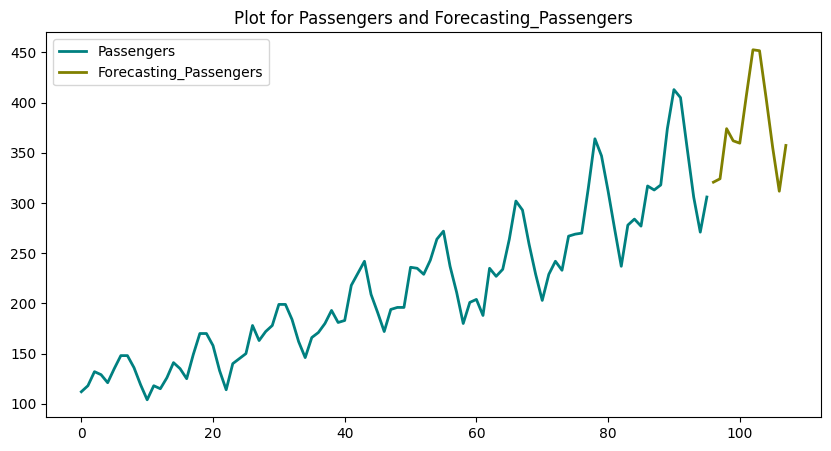

In [96]:
#plot for "airlines_df data" and "forecasting model predicted data"
new_var[['Passengers','Forecasting_Passengers']].reset_index(drop=True).plot(figsize=(10,5),color=['teal','olive'],linewidth=2)
plt.title('Plot for Passengers and Forecasting_Passengers')
plt.show()

# **Observation**

In [97]:
#Multiplicative Additive Seasonality gives the best prediction of least RMSE of 9.469000

**Multiplicative Additive Seasonality gives the best**
**prediction of least RMSE of 9.469000**

# **Data Driven Methods (or) Smoothing Models**

In [98]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
warnings.filterwarnings('ignore')

In [99]:
#Evaluate matrix MAPE
def MAPE(pred,org):
  temp=np.mean(np.abs((pred-org)/org)*100)
  return temp

**1.Simple Exponential Smoothing Method**

In [100]:
#simple exponential smoothing
ses=SimpleExpSmoothing(train['Passengers']).fit(smoothing_level=0.2)
ses_pred=ses.predict(start=test.index[0],end=test.index[-1])
mape_ses=MAPE(ses_pred,test['Passengers'])
rmse_ses=np.sqrt(np.mean((np.array(test['Passengers'])-np.array((ses_pred)))**2))
print('mape_ses:',mape_ses)
print('rmse_ses:',rmse_ses)

mape_ses: 11.375850565189536
rmse_ses: 50.85821670891308


**2.Holt Method or Double Exponential Smoothing Method**

In [101]:
#holt method
holt=Holt(train['Passengers']).fit(smoothing_level=0.2,smoothing_trend=0.15)
holt_pred=holt.predict(start=test.index[0],end=test.index[-1])
mape_holt=MAPE(holt_pred,test['Passengers'])
rmse_holt=np.sqrt(np.mean((np.array(test['Passengers'])-np.array((holt_pred)))**2))
print('mape_holt:',mape_holt)
print('rmse_holt:',rmse_holt)

mape_holt: 21.26026948111893
rmse_holt: 74.44306894247067


**3.HoltWinter Exponential Smoothing with additive seasonality and additive trend**

In [102]:
#holtwinter exponential smoothing with additive seasonality and additive trend
hw_add=ExponentialSmoothing(train['Passengers'],seasonal='add',trend='add',seasonal_periods=12).fit(smoothing_level=0.1,smoothing_trend=0.2,smoothing_seasonal=0.5)
hw_add_pred=hw_add.predict(start=test.index[0],end=test.index[-1])
mape_hw_add=MAPE(hw_add_pred,test['Passengers'])
rmse_hw_add=np.sqrt(np.mean((np.array(test['Passengers'])-np.array((hw_add_pred)))**2))
print('mape_hw_add:',mape_hw_add)
print('rmse_hw_add:',rmse_hw_add)

mape_hw_add: 3.7136085504860645
rmse_hw_add: 14.518271906406751


**4.HoltWinter Exponential Smoothing with multiplicative seasonality and additive trend**

In [103]:
#holtwinter exponential smoothing with multiplicative seasonality and additive trend
hwsn_mul=ExponentialSmoothing(train['Passengers'],seasonal='mul',trend='add',seasonal_periods=12).fit(smoothing_level=0.2,smoothing_trend=0.15,smoothing_seasonal=0.3)
hwsn_mul_pred=hwsn_mul.predict(start=test.index[0],end=test.index[-1])
mape_hwsn_mul=MAPE(hwsn_mul_pred,test['Passengers'])
rmse_hwsn_mul=np.sqrt(np.mean((np.array(test['Passengers'])-np.array((hwsn_mul_pred)))**2))
print("mape_hwsn_mul:",mape_hwsn_mul)
print("rmse_hwsn_mul:",rmse_hwsn_mul)

mape_hwsn_mul: 1.738657309953849
rmse_hwsn_mul: 6.2265276940429075


**5.HoltWinter Exponential Smoothing with additive seasonality and muliplicative trend**

In [104]:
#holtwinter exponential smoothing with additive seasonality and multiplicative trend
hwsn_add=ExponentialSmoothing(train['Passengers'],seasonal='add',trend='mul',seasonal_periods=12).fit(smoothing_level=0.2,smoothing_trend=0.5,smoothing_seasonal=0.8)
hwsn_add_pred=hwsn_add.predict(start=test.index[0],end=test.index[-1])
mape_hwsn_add=MAPE(hwsn_add_pred,test['Passengers'])
rmse_hwsn_add=np.sqrt(np.mean((np.array(test['Passengers'])-np.array((hwsn_add_pred)))**2))
print('mape_hwsn_add:',mape_hwsn_add)
print('rmse_hwsn_add:',rmse_hwsn_add)

mape_hwsn_add: 5.668028283205417
rmse_hwsn_add: 24.191018002274678


**6.Holtwinter Exponential Smoothing with multiplicative seasonality and multiplicative trend**

In [105]:
#holtwinter exponential smoothing and multiplicative seasonality and multiplicative trend
hw_mul=ExponentialSmoothing(train['Passengers'],seasonal='mul',trend='mul',seasonal_periods=12).fit()
hw_mul_pred=hw_mul.predict(start=test.index[0],end=test.index[-1])
mape_hw_mul=MAPE(hw_mul_pred,test['Passengers'])
rmse_hw_mul=np.sqrt(np.mean((np.array(test['Passengers'])-np.array((hw_mul_pred)))**2))
print('mape_hw_mul:',mape_hw_mul)
print('rmse_hw_mul:',rmse_hw_mul)

mape_hw_mul: 1.8506873557356212
rmse_hw_mul: 7.172560179170359


**DataFrame showing MAPE VALUES**

In [106]:
#DataFrame showing MAPE VALUES

In [107]:
val={'Models':pd.Series(['ses_mape','holt_mape','hw_add_mape','hwsn_mul_mape','hwsn_add_mape','hw_mul_mape']),
     'MAPE_Values':pd.Series([mape_ses,mape_holt,mape_hw_add,mape_hwsn_mul,mape_hwsn_add,mape_hw_mul]),
     'RMSE_Values':pd.Series([rmse_ses,rmse_holt,rmse_hw_add,rmse_hwsn_mul,rmse_hwsn_add,rmse_hw_mul])}
MAPE_Table=pd.DataFrame(val)
MAPE_Table=MAPE_Table.sort_values(['MAPE_Values'])
MAPE_Table

,Models,MAPE_Values,RMSE_Values
3,hwsn_mul_mape,1.738657,6.226528
5,hw_mul_mape,1.850687,7.172560
2,hw_add_mape,3.713609,14.518272
4,hwsn_add_mape,5.668028,24.191018
0,ses_mape,11.375851,50.858217
1,holt_mape,21.260269,74.443069


In [108]:
#Best Model with Least Error is holtwinter exponential smoothing method with multiplicative seasonality and additive trend

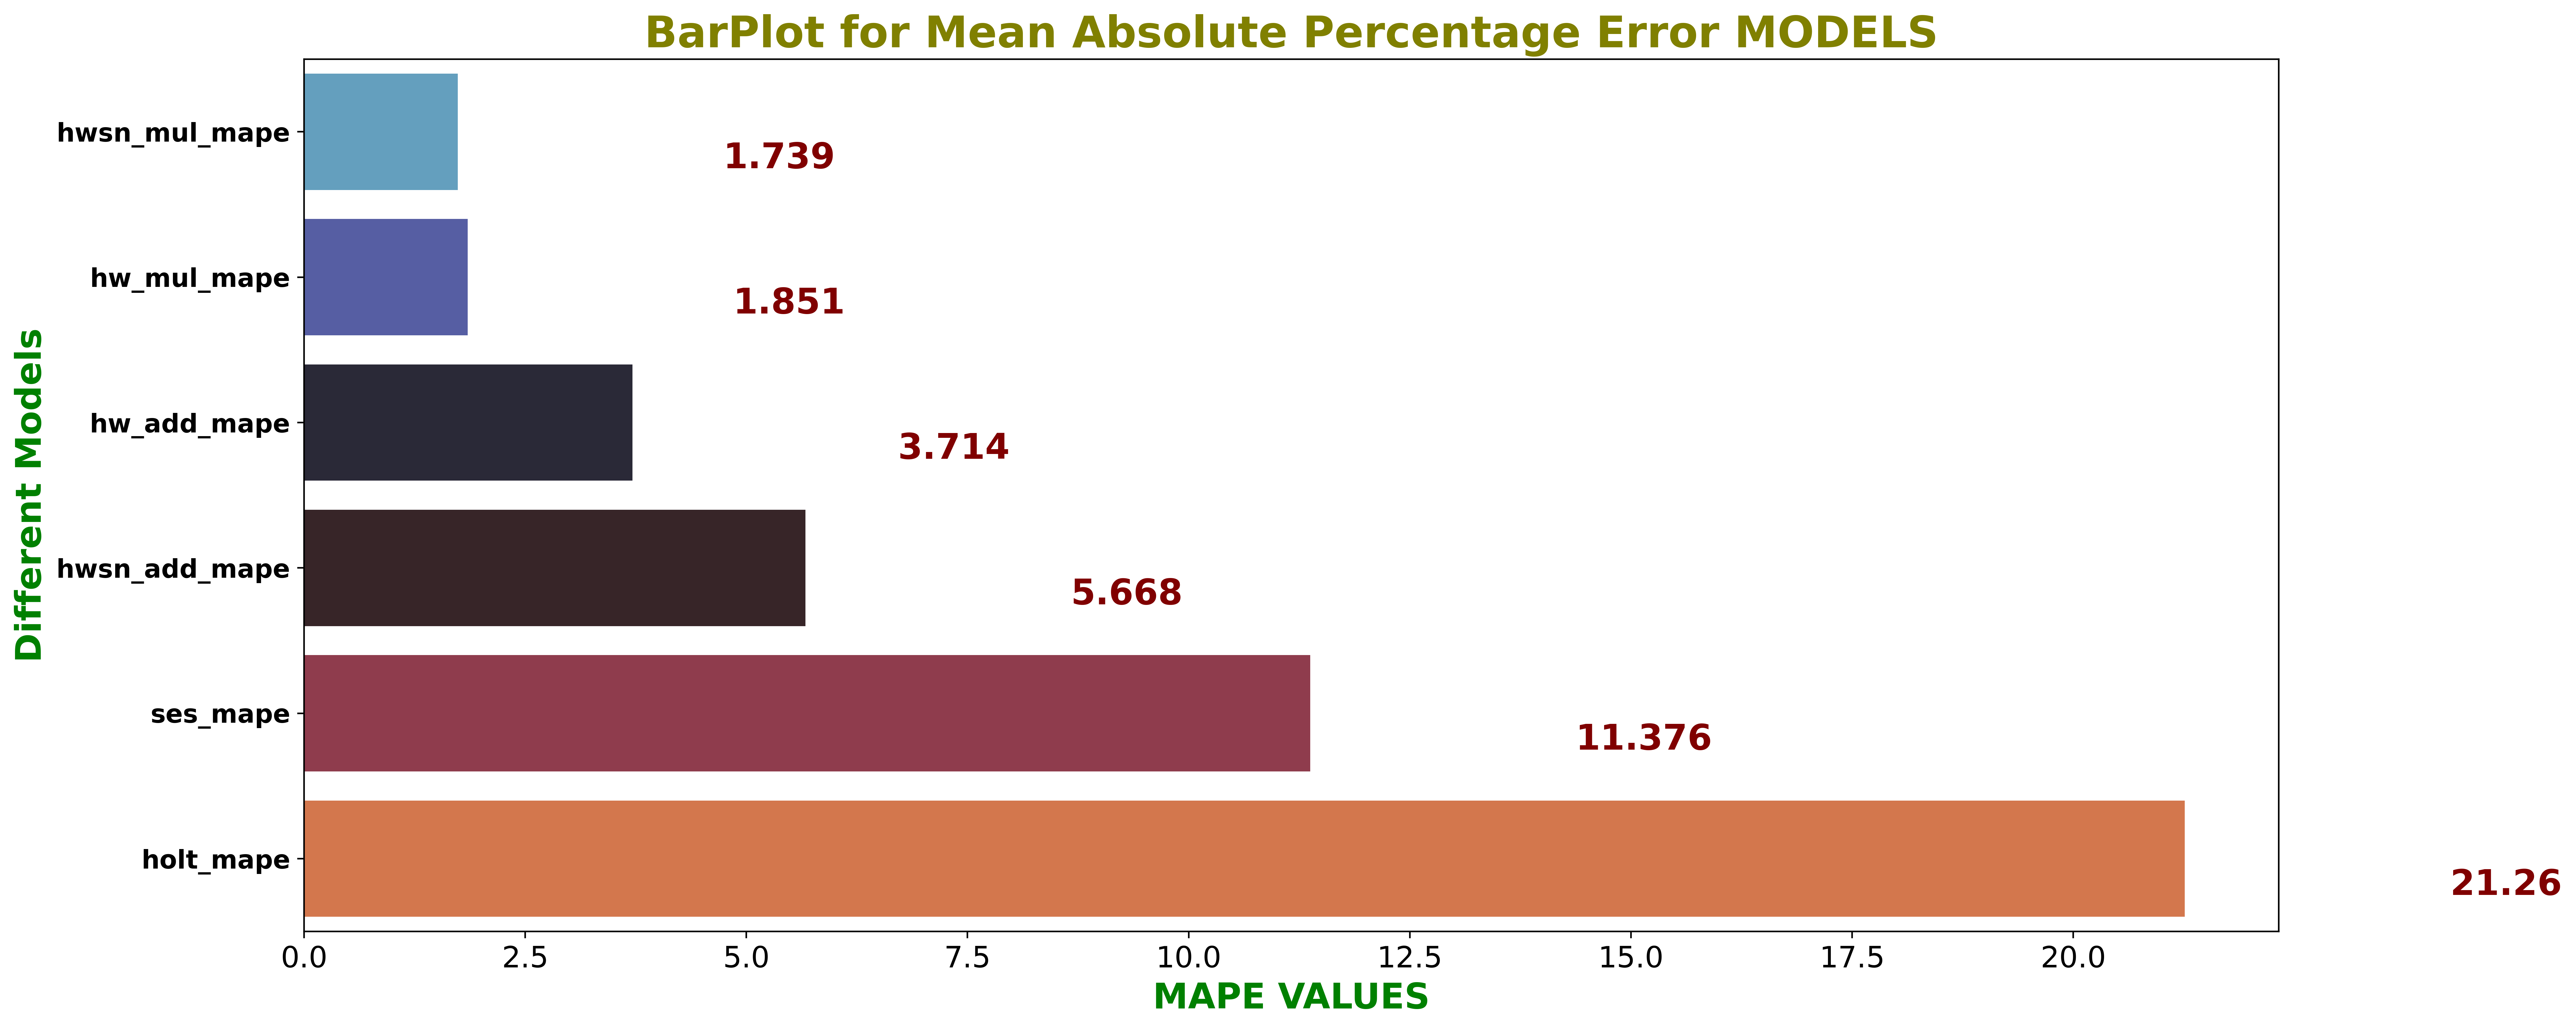

In [109]:
#barplot for MAPE Value
f,axe=plt.subplots(1,1,figsize=(18,8),dpi=500)
sns.barplot(x='MAPE_Values',y='Models',data=MAPE_Table,palette='icefire')
plt.xlabel('MAPE VALUES',size=18,fontweight='bold',color='green')
plt.ylabel('Different Models',size=18,fontweight='bold',color='green')
plt.xticks(fontsize=15)
plt.yticks(fontsize=13,fontweight='bold')
plt.title('BarPlot for Mean Absolute Percentage Error MODELS',fontsize=22,fontweight='bold',color='olive')
for i,v in enumerate(np.round(MAPE_Table.MAPE_Values.values,3)):
  axe.text(v+3,i+.25,str(v),color='maroon',fontweight='bold',fontsize=18)
plt.show()

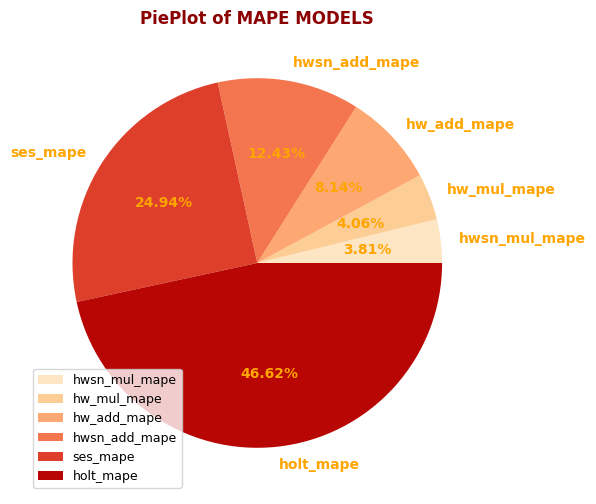

In [110]:
#PiePlot for MAPE Value
plt.figure(figsize=(6,6))
palette_color=sns.color_palette('OrRd')
plt.pie(MAPE_Table['MAPE_Values'],labels=MAPE_Table['Models'],autopct='%.2f%%',colors=palette_color,textprops={'fontsize':10,'fontweight':'bold','color':'orange'})
plt.title('PiePlot of MAPE MODELS',color='darkred',fontweight='bold')
plt.legend(fontsize=9,loc='lower left')
plt.show()

In [111]:
#HoltWinter Exponential Smoothing with multiplicative seasonality with additive trend is best model with least error.

# **Predicting using Smoothing Methods**

In [112]:
#After training all the models we get to know that,
#""holtwinter smoothing method with multiplicative seasonality and additive trend"" is best model with least error.

In [113]:
#final model combination of training and testing data
#consider airlines_df as training data_set and forecast for next 12 time period

In [114]:
#final model for smoothing model
finalsmoothing=ExponentialSmoothing(airlines_df['Passengers'],seasonal='mul',trend='add',seasonal_periods=12).fit(smoothing_level=0.2,smoothing_trend=0.15,smoothing_seasonal=0.3)

In [115]:
#forecasting for next 12 time periods
forecastsmoothing=finalsmoothing.forecast(12)
forecastsmoothing

96     318.772810
97     312.918421
98     364.912200
99     359.118757
100    361.757794
101    413.227604
102    458.606551
103    447.958505
104    395.380569
105    345.494342
106    302.761588
107    347.074081
dtype: float64

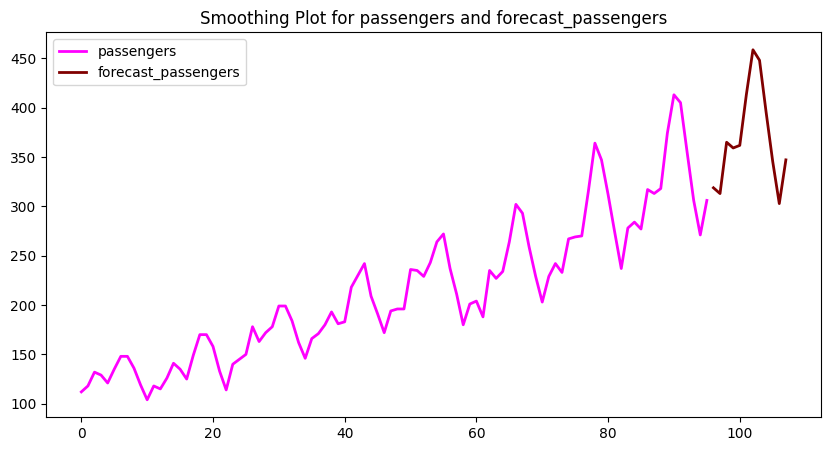

In [116]:
#plot for "airlines_df data" and "smoothing model predicted data"
airlines_df['Passengers'].plot(figsize=(10,5),label='passengers',color='fuchsia',linewidth=2)
forecastsmoothing.plot(figsize=(10,5),label='forecast_passengers',color='maroon',linewidth=2)
plt.title('Smoothing Plot for passengers and forecast_passengers')
plt.legend(loc='best')
plt.show()

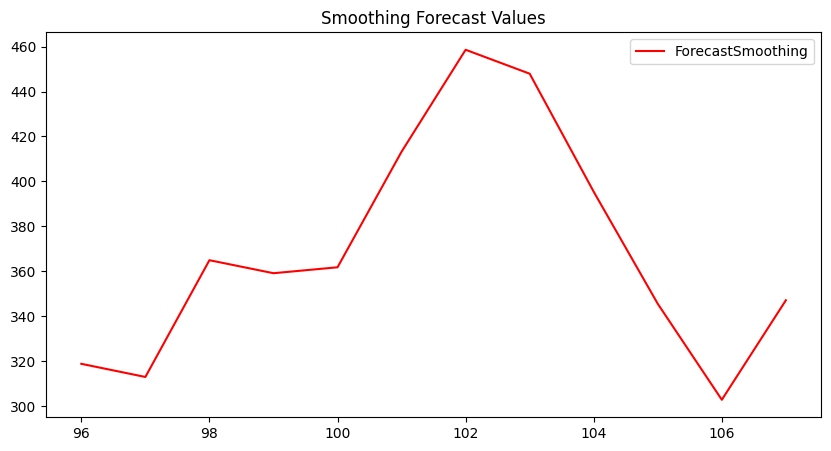

In [117]:
#plot for only smoothing forecast values
forecastsmoothing.plot(figsize=(10,5),color='red',label='ForecastSmoothing')
plt.title('Smoothing Forecast Values')
plt.legend(loc='best')
plt.show()

# **Observation**

In [118]:
#HoltWinter Smoothing Method with Multiplicative Seasonality and Additive Trend gives the best prediction
# with least MAPE of 1.738657

 HoltWinter Smoothing Method with Multiplicative Seasonality and
 Additive trend gives the best prediction with least MAPE of 1.738657

# **Forecasting using ARIMA Model**

In [119]:
!pip install pmdarima
from pmdarima import auto_arima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.2 MB/s eta 0:00:00


In [120]:
#fit auto-arima method
stepwise=auto_arima(airlines_df['Passengers'],start_p=1,start_q=1,max_p=3,max_q=3,max=12,trace=True,
                    error_action='ignore',supress_warning=True,stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=862.193, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=871.345, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=867.283, Time=0.33 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=863.757, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=870.076, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.80 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=861.773, Time=0.23 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=860.702, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=862.251, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=855.919, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=860.821, Time=0.08 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=856.719, Time=0.12 se

In [121]:
stepwise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   96
Model:               SARIMAX(3, 1, 2)   Log Likelihood                -421.170
Date:                Wed, 17 Jan 2024   AIC                            854.341
Time:                        12:50:28   BIC                            869.664
Sample:                             0   HQIC                           860.533
                                 - 96                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1526      0.142      1.071      0.284      -0.127       0.432
ar.L2          0.4062      0.144      2.815      0.005       0.123       0.689
ar.L3         -0.3167      0.121     -2.619      0.009      -0.554      -0.080
ma.L1          0.1470      0.121      1.215      0.224      -0.090       0.384
ma.L2         -0.7809      0.116     -6.734      0.000      -1.008      -0.554
sigma2       409.9286     75.390      5.437      0.000     262.167     557.690
===================================================================================
Ljung-Box (L1) (Q):                   0.68   Jarque-Bera (JB):                 3.94
Prob(Q):                              0.41   Prob(JB):                         0.14
Heteroskedasticity (H):               3.63   Skew:                             0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Building SARIMAX MODEL**

In [122]:
#building seasonal SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarimax=SARIMAX(train['Passengers'],order=(0,1,1),seasonal_order=(2,1,1,12))
sarimax_res=sarimax.fit()
sarimax_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                   80
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -247.038
Date:                            Wed, 17 Jan 2024   AIC                            504.076
Time:                                    12:50:31   BIC                            515.100
Sample:                                         0   HQIC                           508.438
                                             - 80                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2154      0.115     -1.877      0.060      -0.440       0.009
ar.S.L12      -1.2163      1.046     -1.163      0.245      -3.267       0.834
ar.S.L24      -0.3639      0.282     -1.292      0.196      -0.916       0.188
ma.S.L12       0.9988     90.836      0.011      0.991    -177.037     179.034
sigma2        83.5399   7504.884      0.011      0.991   -1.46e+04    1.48e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.18
Prob(Q):                              0.93   Prob(JB):                         0.34
Heteroskedasticity (H):               2.40   Skew:                             0.43
Prob(H) (two-sided):                  0.05   Kurtosis:                         2.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [123]:
#predicting sarimax model
start=len(train)
end=len(train)+len(test)-1
sarimax_pred=sarimax_res.predict(start,end,type='levels')
sarimax_pred

80    313.882560
81    285.223768
82    258.047669
83    284.126655
84    294.547704
85    283.261879
86    324.237630
87    324.339875
88    326.992245
89    360.787802
90    405.811048
91    391.522304
92    358.959038
93    330.124577
94    302.559436
95    326.722871
Name: predicted_mean, dtype: float64

In [124]:
#RMSE Value
rsme_sarimax=np.sqrt(np.mean((np.array(test["Passengers"])-np.array([sarimax_pred]))**2))
rsme_sarimax

14.691313457088587

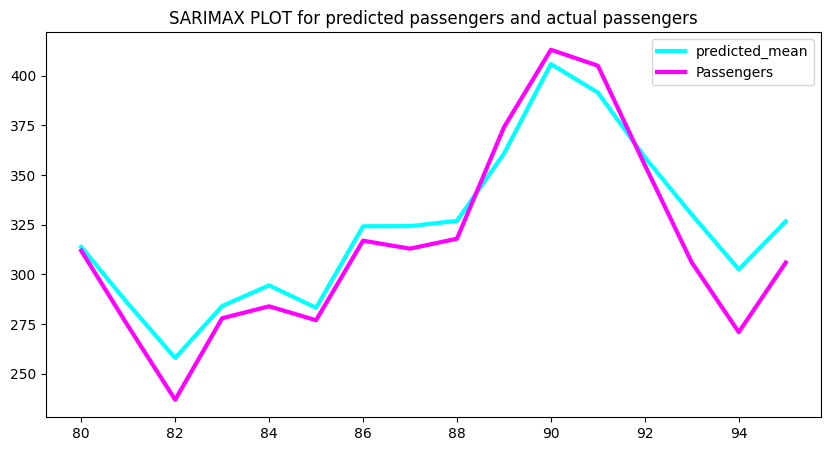

In [125]:
#plot for sarimax predict and test values
sarimax_pred.plot(figsize=(10,5),linewidth=3,color='cyan',legend=True)
test['Passengers'].plot(figsize=(10,5),linewidth=3,color='fuchsia',legend=True)
plt.title('SARIMAX PLOT for predicted passengers and actual passengers')
plt.show()

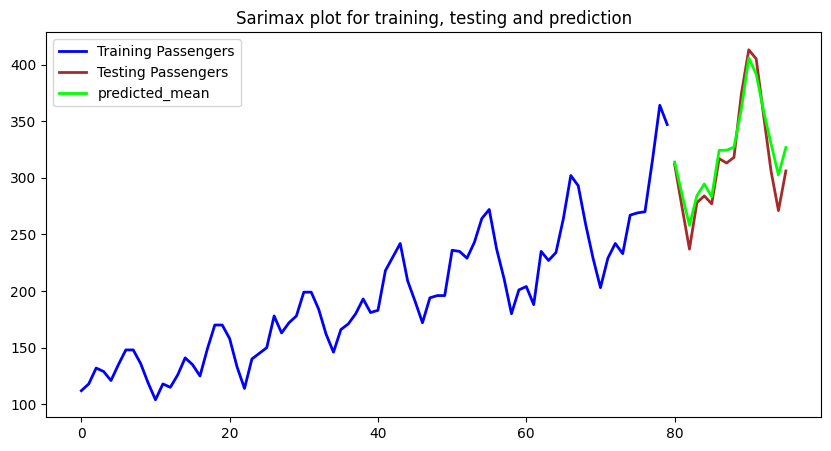

In [126]:
#plot for train,test,sarimax predict
train['Passengers'].plot(figsize=(10,5),linewidth=2,color='blue',label='Training Passengers',legend=True)
test['Passengers'].plot(figsize=(10,5),linewidth=2,color='brown',label='Testing Passengers',legend=True)
sarimax_pred.plot(figsize=(10,5),linewidth=2,color='lime',legend=True)
plt.title('Sarimax plot for training, testing and prediction')
plt.show()

# **Observation**

In [127]:
# In Arima Sarimax Model the RMSE we got is 14.691313457

**In Arima Sarimax Model the RMSE we got is 14.691313457**

# **Conclusion**

In [128]:
# So In this we have performed 3 methods or techique ["Forecasting Methods","Smoothing Methods","ARIMA Method"]

In [129]:
#In Forecasting Method best model with least error is Multiplicative additive seasonality Model
#In Smoothing Method best model with least error is holtwinter smoothing method with multiplicative seasonality and additive trend
#In Arima Method for best model with least error we had performed SARIMAX MODEL

In [130]:
# For Multiplicative additive seasonality, RMSE or Error got is  [mul_add_sea_rmse:9.469000]
# For HoltWinter Smoothing Method with Multiplicative Seasonality and Additive Trend , ERROR we got is
# for MAPE [hwsn_mul_mape:1.738657] , for RMSE [rmse_hwsn_mul: 6.2265276940429075]
# For Arima SARIMAX Model, RMSE and ERROR we got is [rmse_sarimax:14.69131345]

In [131]:
#So Best Model with Least Error gain is HoltWinter Smoothing Method with Multiplicative Seasonality and Additive Trend

**DataFrame showing Error Values of all method models**

In [132]:
#dataframe for all models and errors
fin_err_df={'DIFFERENT MODELS':pd.Series(['linear','exponential','quadratic','add_sea','add_sea_quad','mul_sea','mul_sea_quad','mul_add_sea_',
                                'ses','holt','hw_add','hwsn_mul','hwsn_add','hw_mul','sarimax']),
            'ERRORS':pd.Series([rmse_linear,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_mul_sea,rmse_mul_sea_quad,
                                     rmse_mul_add_sea,rmse_ses,rmse_holt,rmse_hw_add,rmse_hwsn_mul,rmse_hwsn_add,rmse_hw_mul,rsme_sarimax])}
ERROR_TABLE=pd.DataFrame(fin_err_df)
ERROR_TABLE=ERROR_TABLE.sort_values(['ERRORS'])
ERROR_TABLE

,DIFFERENT MODELS,ERRORS
11,hwsn_mul,6.226528
13,hw_mul,7.172560
7,mul_add_sea_,9.469000
10,hw_add,14.518272
14,sarimax,14.691313
6,mul_sea_quad,23.086349
4,add_sea_quad,23.910984
12,hwsn_add,24.191018
2,quadratic,43.654404
1,exponential,43.793739


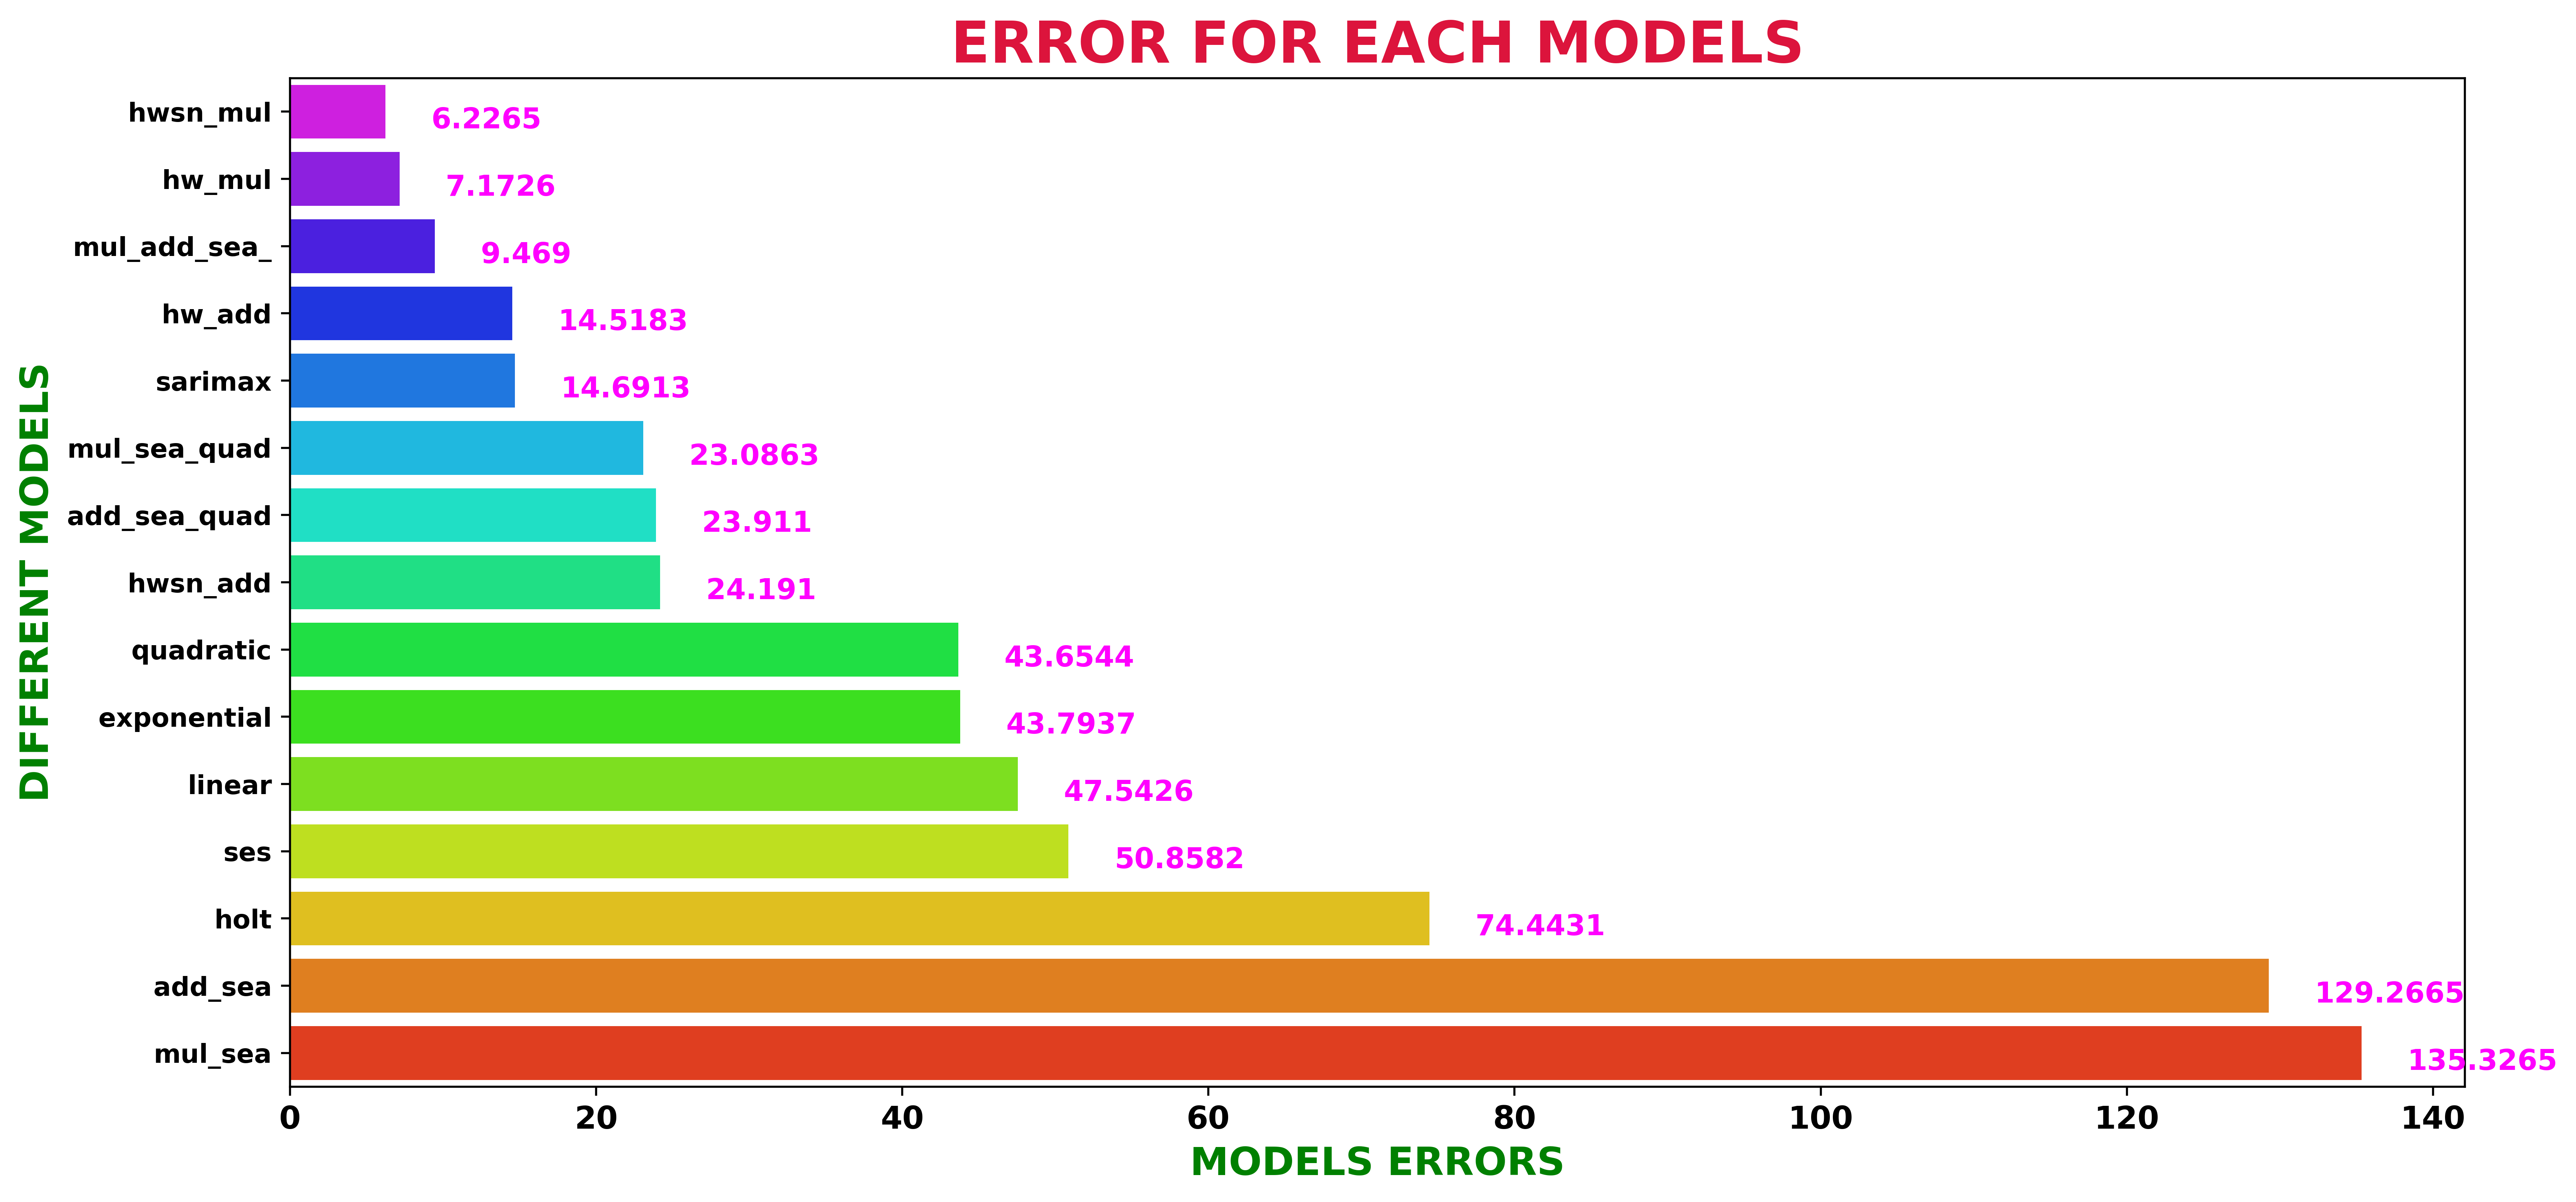

In [133]:
#BarPlot
f,axe=plt.subplots(1,1,figsize=(15,7),dpi=500)
sns.barplot(x='ERRORS',y='DIFFERENT MODELS',data=ERROR_TABLE,palette='gist_rainbow_r')
plt.xlabel('MODELS ERRORS',fontsize=15,fontweight='bold',color='green')
plt.ylabel('DIFFERENT MODELS',size=15,fontweight='bold',color='green')
plt.xticks(fontsize=12,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')
plt.title('ERROR FOR EACH MODELS',fontsize=22,fontweight='bold',color='crimson')
for i,v in enumerate(np.round(ERROR_TABLE.ERRORS.values,4)):
  axe.text(v+3,i+.25,str(v),color='fuchsia',fontweight='bold',fontsize=11)
plt.show()

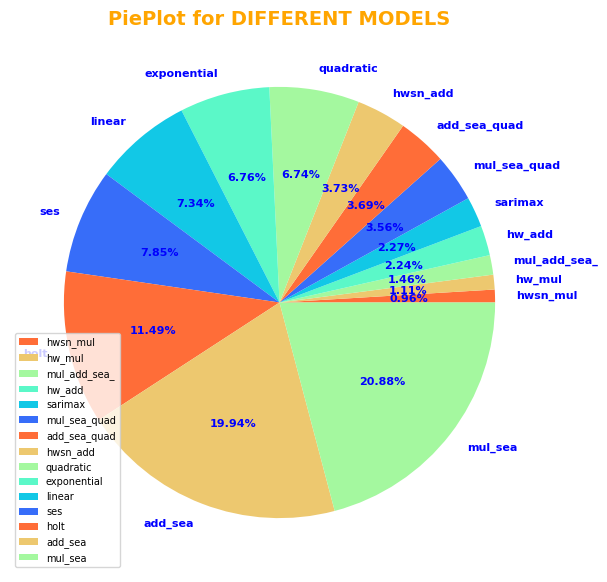

In [134]:
#pie chart
plt.figure(figsize=(7,7))
color_palette=sns.color_palette('rainbow_r')
plt.pie(ERROR_TABLE['ERRORS'],labels=ERROR_TABLE['DIFFERENT MODELS'],autopct='%.2f%%',colors=color_palette,textprops={'fontsize':8,'fontweight':'bold','color':'blue'})
plt.title('PiePlot for DIFFERENT MODELS',fontweight='bold',color='orange',fontsize=14)
plt.legend(loc='lower left',fontsize=7)
plt.show()

In [135]:
#So from above different model building techinques we have got least error in,
#HoltWinter Exponential Smoothing Method with Multiplicative Seasonality and Additive Trend.
#HoltWinter Exponential Smoothing Method with Multiplicative Seasonality and Additive trend gives the best prediction with
#least error i.e (MAPE : 1.738657) and (rmse_hwsn_mul : 6.2265276)

**So Best Model with Least Error is HoltWinterSmoothing Method with Multiplicative Seasonality and Additive Trend Model**

# **Final Model Building**

In [136]:
#final model building with holtwinter exponential smoothing method with multiplicative seasonality and additive trend.

In [137]:
#final model
final=ExponentialSmoothing(airlines_df['Passengers'],seasonal='mul',trend='add',seasonal_periods=12).fit(smoothing_level=0.2,smoothing_trend=0.15,smoothing_seasonal=0.3)

In [138]:
#forecast for next 12 time periods
final.forecast(12)

96     318.772810
97     312.918421
98     364.912200
99     359.118757
100    361.757794
101    413.227604
102    458.606551
103    447.958505
104    395.380569
105    345.494342
106    302.761588
107    347.074081
dtype: float64

In [139]:
#Therefore prediction for next 12 time periods

In [140]:
###completed//////////

# **Completed**